# <center>**Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning💼📊**</center>

---

<h2><center>Author: Bintang Phylosophie</center></h2>

## Dataset Information
This dataset contains customer information related to demographics, purchasing behavior, and marketing campaign responses. It includes details such as age, education, marital status, income, and household composition. Additionally, it tracks spending across different product categories, purchase channels, and engagement with marketing campaigns. The dataset also records customer complaints and recent interactions, making it valuable for analyzing consumer behavior, predicting marketing campaign success, and improving customer relationship management strategies. This dataset is from a fictional company in 2012-2014. 


## Attribute Information
### Project Overview
A company can develop rapidly when it knows its customers' personality behavior, so that it can provide better services and benefits to customers who have the potential to become loyal customers. By processing historical marketing campaign data to improve performance and target the right customers so they can make transactions on the company's platform, from this data insight our focus is to create a cluster prediction model to make it easier for companies to make decisions.
### Identifier
`ID` is unique ID that each of which is an ID for each customer and a column called `Unnamed: 0` which seems to function more as an index.
### Company Goals
The goal of the company is to enhance customer relationship management by developing data-driven marketing strategies that improve engagement, increase sales, and optimize resource allocation based on customer segmentation insights.
### Problems
The company wants to better understand its customer base by identifying distinct customer segments based on demographic information, purchasing behavior, and engagement with marketing campaigns. Currently, marketing strategies are applied uniformly across all customers, leading to suboptimal targeting and lower campaign effectiveness. By implementing a clustering model, the company aims to segment customers into meaningful groups to personalize marketing efforts and improve customer retention.
### Objectives
1. **Segment Customers** : Apply clustering techniques to group customers based on demographics, purchasing behavior, and engagement with marketing campaigns.

2. **Analyze Customer Profiles** : Identify key characteristics of each segment, such as spending habits, preferred shopping channels, and responsiveness to promotions.

3. **Marketing Strategies** : Develop targeted campaigns tailored to distinct customer segments to enhance engagement and conversion rates.

4. **Boost Customer Retention**: Detect high-value and at-risk customers to implement proactive retention strategies.

5. **Optimize Resource Allocation** : Improve business efficiency by focusing marketing efforts on the most profitable and responsive customer groups.

<br>

The process will go through the following steps to achieve the objectives:
1. Data Understanding
2. Feature Engineering
3. Insight
4. Exploratory Data Analysis
5. Data Preprocessing
6. Machine Learning

## Libraries and Tools:
For this project, you will need a variety of libraries and tools, including but not limited to:

* **Python**: The primary programming language for data analysis and machine learning.
* **NumPy and Pandas**: For data manipulation and analysis.
* **Scikit-Learn**: To build and evaluate machine learning models.
* **Matplotlib and Seaborn**: For data visualization.
Natural Language Processing (NLP) Libraries (e.g., NLTK or SpaCy) for text analysis in resignation letters.
* **Jupyter Notebooks**: For interactive data exploration and model development.
* **GitHub** for collaboration and code management. Also to keep track of project progress, document the work, and collaborate with HR and relevant departments to ensure the model aligns with the company's goals and policies.

# **Import Libraries**

In [4]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from datetime import datetime
from scipy import stats


# File system manangement
import os


# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Model
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

from scipy.stats import chi2_contingency


# **Data Understanding**

First we load the dataset and start basic data analysis about the features.

In [5]:
link = 'https://drive.google.com/uc?export=download&id=19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr'
df = pd.read_csv(link)

In [6]:
print('shape of the data:', df.shape)
df.head()

shape of the data: (2240, 30)


Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  04-09-2012       58  ...                  7             0   
1         1  08-03-2014       38  ...                  5             0   
2         0  21-08-2013       26  ...                  4             0   
3         0  10-02-2014       26  ...                  6             0   
4         0  19-01-2014       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 30 columns]

In [7]:
df.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# pengecekan keseluruhan dataframe
def percent_null(series):
    total_nulls = (series.isnull() | (series == ' ')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

summary_data = []

for col in df.columns:
    column_summary = {
        'Column Name': col,
        '%null': str(percent_null(df[col]))+"%",
        'dtype': df[col].dtype,
        'count': df[col].count(),
        'nunique': df[col].nunique(),
        'mode': df[col].mode().values if not df[col].mode().empty else None,
        'unique value': list(df[col].value_counts().to_dict().keys())
    }
    summary_data.append(column_summary)
pd.DataFrame(summary_data)

Column Name  %null    dtype  count  nunique  \
0            Unnamed: 0     0%    int64   2240     2240   
1                    ID     0%    int64   2240     2240   
2            Year_Birth     0%    int64   2240       59   
3             Education     0%   object   2240        5   
4        Marital_Status     0%   object   2240        6   
5                Income  1.07%  float64   2216     1974   
6               Kidhome     0%    int64   2240        3   
7              Teenhome     0%    int64   2240        3   
8           Dt_Customer     0%   object   2240      663   
9               Recency     0%    int64   2240      100   
10              MntCoke     0%    int64   2240      776   
11            MntFruits     0%    int64   2240      158   
12      MntMeatProducts     0%    int64   2240      558   
13      MntFishProducts     0%    int64   2240      182   
14     MntSweetProducts     0%    int64   2240      177   
15         MntGoldProds     0%    int64   2240      213   
16    NumDealsPurchases     0%    int64   2240       15   
17      NumWebPurchases     0%    int64   2240       15   
18  NumCatalogPurchases     0%    int64   2240       14   
19    NumStorePurchases     0%    int64   2240       14   
20    NumWebVisitsMonth     0%    int64   2240       16   
21         AcceptedCmp3     0%    int64   2240        2   
22         AcceptedCmp4     0%    int64   2240        2   
23         AcceptedCmp5     0%    int64   2240        2   
24         AcceptedCmp1     0%    int64   2240        2   
25         AcceptedCmp2     0%    int64   2240        2   
26             Complain     0%    int64   2240        2   
27        Z_CostContact     0%    int64   2240        1   
28            Z_Revenue     0%    int64   2240        1   
29             Response     0%    int64   2240        2   

                                                 mode  \
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   [0, 1, 9, 13, 17, 20, 22, 24, 25, 35, 48, 49, ...   
2                                              [1976]   
3                                                [S1]   
4                                           [Menikah]   
5                                         [7500000.0]   
6                                                 [0]   
7                                                 [0]   
8                                        [31-08-2012]   
9                                                [56]   
10                                             [2000]   
11                                                [0]   
12                                             [7000]   
13                                                [0]   
14                                                [0]   
15                                             [1000]   
16                                                [1]   
17                                                [2]   
18                                                [0]   
19                                                [3]   
20                                                [7]   
21                                                [0]   
22                                                [0]   
23                                                [0]   
24                                                [0]   
25                                                [0]   
26                                                [0]   
27                                                [3]   
28                                               [11]   
29                                                [0]   

                                         unique value  
0   [0, 1496, 1490, 1491, 1492, 1493, 1494, 1495, ...  
1   [5524, 6885, 3478, 7494, 1763, 7250, 2005, 107...  
2   [1976, 1971, 1975, 1972, 1978, 1970, 1973, 196...  
3                               [S1, S3, S2, D3, SMA]  
4   [Menikah, Bertunangan, Lajang, Cerai, Janda, D...  
5   [7500000.0, 35860000.0, 37760000.0, 83844000.0...  
6                     

In [9]:
cat_var = df.select_dtypes(include=['object', 'category']).columns
num_var = df.select_dtypes(include=np.number)

In [10]:
num_var.describe()

Unnamed: 0            ID   Year_Birth        Income      Kidhome  \
count  2240.000000   2240.000000  2240.000000  2.216000e+03  2240.000000   
mean   1119.500000   5592.159821  1968.805804  5.224725e+07     0.444196   
std     646.776623   3246.662198    11.984069  2.517308e+07     0.538398   
min       0.000000      0.000000  1893.000000  1.730000e+06     0.000000   
25%     559.750000   2828.250000  1959.000000  3.530300e+07     0.000000   
50%    1119.500000   5458.500000  1970.000000  5.138150e+07     0.000000   
75%    1679.250000   8427.750000  1977.000000  6.852200e+07     1.000000   
max    2239.000000  11191.000000  1996.000000  6.666660e+08     2.000000   

          Teenhome      Recency       MntCoke      MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2.240000e+03    2240.000000     2.240000e+03   
mean      0.506250    49.109375  3.039357e+05   26302.232143     1.669500e+05   
std       0.544538    28.962453  3.365974e+05   39773.433765     2.257154e+05   
min       0.000000     0.000000  0.000000e+00       0.000000     0.000000e+00   
25%       0.000000    24.000000  2.375000e+04    1000.000000     1.600000e+04   
50%       0.000000    49.000000  1.735000e+05    8000.000000     6.700000e+04   
75%       1.000000    74.000000  5.042500e+05   33000.000000     2.320000e+05   
max       2.000000    99.000000  1.493000e+06  199000.000000     1.725000e+06   

       ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count  ...        2240.000000   2240.000000   2240.000000   2240.000000   
mean   ...           5.316518      0.072768      0.074554      0.072768   
std    ...           2.426645      0.259813      0.262728      0.259813   
min    ...           0.000000      0.000000      0.000000      0.000000   
25%    ...           3.000000      0.000000      0.000000      0.000000   
50%    ...           6.000000      0.000000      0.000000      0.000000   
75%    ...           7.000000      0.000000      0.000000      0.000000   
max    ...          20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean       0.064286      0.013393     0.009375            3.0       11.0   
std        0.245316      0.114976     0.096391            0.0        0.0   
min        0.000000      0.000000     0.000000            3.0       11.0   
25%        0.000000      0.000000     0.000000            3.0       11.0   
50%        0.000000      0.000000     0.000000            3.0       11.0   
75%        0.000000      0.000000     0.000000            3.0       11.0   
max        1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 27 columns]

In [11]:
df[cat_var].describe()

Education Marital_Status Dt_Customer
count       2240           2240        2240
unique         5              6         663
top           S1        Menikah  31-08-2012
freq        1127            864          12

# **Data Preprocessing**

## Handle Duplicated

In [12]:
df.duplicated().sum()

0

Lets check what if we remove the identifier with a copy of dataset.

In [13]:
df_copy = df.copy()
df_copy.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)
df_copy.duplicated().sum()


183

In [14]:
df_copy[df_copy.duplicated(keep=False)].sort_values('Income').head(20)


Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
30          1989        S2          Cerai  10979000.0        0         0   
1138        1989        S2          Cerai  10979000.0        0         0   
1203        1979        S1          Cerai  15287000.0        1         0   
260         1979        S1          Cerai  15287000.0        1         0   
558         1970        D3        Menikah  15315000.0        0         0   
1107        1970        D3        Menikah  15315000.0        0         0   
786         1960        S2    Bertunangan  17144000.0        1         1   
1596        1960        S2    Bertunangan  17144000.0        1         1   
1424        1959        S1        Menikah  18690000.0        0         0   
1731        1959        S1        Menikah  18690000.0        0         0   
665         1959        S1        Menikah  18690000.0        0         0   
258         1964        S1         Lajang  18701000.0        1         1   
1807        1964        S1         Lajang  18701000.0        1         1   
1916        1990        S1        Menikah  18929000.0        0         0   
2204        1990        S1        Menikah  18929000.0        0         0   
1343        1990        S1        Menikah  18929000.0        0         0   
381         1985        S1        Menikah  19986000.0        1         0   
661         1985        S1        Menikah  19986000.0        1         0   
444         1974        D3        Menikah  20130000.0        0         0   
1171        1974        D3        Menikah  20130000.0        0         0   

     Dt_Customer  Recency  MntCoke  MntFruits  ...  NumWebVisitsMonth  \
30    22-05-2014       34     8000       4000  ...                  5   
1138  22-05-2014       34     8000       4000  ...                  5   
1203  10-10-2012       60     1000       2000  ...                  7   
260   10-10-2012       60     1000       2000  ...                  7   
558   03-08-2013       27     7000       4000  ...                  5   
1107  03-08-2013       27     7000       4000  ...                  5   
786   15-02-2014       96    18000       2000  ...                  7   
1596  15-02-2014       96    18000       2000  ...                  7   
1424  28-12-2012       77     6000       1000  ...                  8   
1731  28-12-2012       77     6000       1000  ...                  8   
665   28-12-2012       77     6000       1000  ...                  8   
258   04-06-2013       95    12000       4000  ...                  5   
1807  04-06-2013       95    12000       4000  ...                  5   
1916  16-02-2013       15    32000          0  ...                  6   
2204  16-02-2013       15    32000          0  ...                  6   
1343  16-02-2013       15    32000          0  ...                  6   
381   14-11-2013       74     3000       6000  ...                  7   
661   14-11-2013       74     3000       6000  ...                  7   
444   17-03-2014       99        0       6000  ...                  8   
1171  17-03-2014       99        0       6000  ...                  8   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
30               0             0             0             0             0   
1138             0             0             0             0             0   
1203             1             0             0             0             0   
260              1             0             0             0             0   
558              0             0             0             0             0   
1107             0             0             0             0             0   
786              0             0             0             0             0   
1596             0             0             0             0             0   
1424             0             0             0             0             0   
1731             0             0             0             0             0   
665              


Initially, there were no duplicates in the dataset. However, after removing the identifier column `ID` and the index column `Unnamed: 0`, 183 duplicate records were found. Since exact duplicates are unnecessary for our machine learning model, I decided to remove them and retain only one instance of each and apply it in actual dataset.

In [15]:
df.drop(['Unnamed: 0', 'ID'], axis=1, inplace=True)

df = df.drop_duplicates()

## Handling missing value

Number of missing value of each column

In [16]:
missing_values_count = df.isnull().sum()
missing_values_count

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [17]:
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

# Sort columns by the percentage of missing values in descending order
missing_values_percentage = missing_values_percentage.sort_values(ascending=False)
print('missing values percentage')
missing_values_percentage

missing values percentage


Income                 1.166748
Year_Birth             0.000000
NumWebPurchases        0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumDealsPurchases      0.000000
Education              0.000000
MntGoldProds           0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntCoke                0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Response               0.000000
dtype: float64

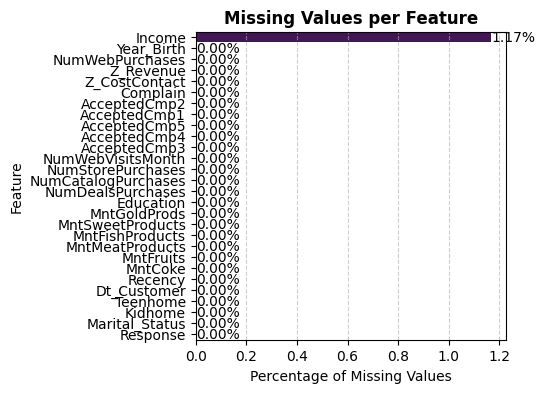

In [18]:
# Create the horizontal bar chart
plt.figure(figsize=(4, 4))
sns.barplot(x=missing_values_percentage, y=missing_values_percentage.index, palette="viridis")

# Add percentage labels to the bars
for index, value in enumerate(missing_values_percentage):
    plt.text(value, index, f'{value:.2f}%', va='center', fontsize=10)

plt.xlabel('Percentage of Missing Values')
plt.ylabel('Feature')
plt.title('Missing Values per Feature', fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

There is only one column contain missing value. Let's find out the best way to fill the missing values.

In [19]:
# Calculate the mean of 'Year_Birth' where 'Income' is NaN
year_birth_for_nan_income = df.loc[df['Income'].isnull(), 'Year_Birth'].describe()

print("Mean Year of Birth for NaN Income:", year_birth_for_nan_income)

# Get unique Year_Birth values where Income is null
unique_year_birth = df.loc[df['Income'].isnull(), 'Year_Birth'].unique()

# Sort the values
sorted_year_birth = np.sort(unique_year_birth)  # Using np.sort for sorting

print('Year birht list for NaN income:', sorted_year_birth)

Mean Year of Birth for NaN Income: count      24.000000
mean     1967.458333
std        12.021644
min      1943.000000
25%      1957.750000
50%      1969.500000
75%      1974.250000
max      1989.000000
Name: Year_Birth, dtype: float64
Year birht list for NaN income: [1943 1951 1954 1955 1957 1958 1959 1961 1963 1964 1969 1970 1971 1972
 1973 1978 1981 1982 1983 1986 1989]


In [20]:
# List of selected Year_Birth values
selected_years = [1943, 1951, 1954, 1955, 1957, 1958, 1959, 1961, 1963, 1964, 
                  1969, 1970, 1971, 1972, 1973, 1978, 1981, 1982, 1983, 1986, 1989]

# Filter the DataFrame for the selected Year_Birth values
filtered_df = df[df['Year_Birth'].isin(selected_years)]

# Group by 'Year_Birth' and calculate mean and median of 'Income'
income_stats = filtered_df.groupby('Year_Birth')['Income'].agg(['max', 'min', 'mean', 'median','count']).reset_index()

# Display the resulting DataFrame
income_stats


Year_Birth          max         min          mean      median  count
0         1943   77598000.0  48948000.0  6.499940e+07  65073000.0      5
1         1951   94642000.0  15033000.0  5.603733e+07  58217000.0     39
2         1954   93404000.0  22507000.0  5.894727e+07  61335000.0     44
3         1955   82384000.0  22554000.0  5.876074e+07  59821000.0     43
4         1957   82347000.0   6835000.0  5.555759e+07  55267000.0     39
5         1958   94472000.0  15056000.0  5.933852e+07  63146000.0     50
6         1959   89120000.0  18690000.0  5.694970e+07  58582500.0     46
7         1961   88347000.0  16860000.0  5.740509e+07  59864000.0     32
8         1963   81300000.0   4023000.0  4.845382e+07  48918000.0     39
9         1964   85620000.0  18701000.0  5.791678e+07  60597000.0     37
10        1969   94871000.0   4428000.0  5.155386e+07  53753000.0     64
11        1970  105471000.0  13260000.0  5.298938e+07  55282000.0     71
12        1971  157733000.0   1730000.0  5.025765e+07  45159500.0     78
13        1972   86857000.0  14188000.0  4.976797e+07  46198500.0     72
14        1973  157243000.0   3502000.0  4.752698e+07  44051000.0     65
15        1978   88097000.0   7500000.0  4.640666e+07  42282500.0     70
16        1981   91065000.0  19414000.0  4.611441e+07  41967000.0     37
17        1982  160803000.0   6560000.0  4.948624e+07  42948000.0     38
18        1983  101970000.0  21840000.0  5.006386e+07  37292000.0     35
19        1986   92910000.0   7500000.0  4.322211e+07  33777500.0     38
20        1989   88420000.0   9255000.0  4.333721e+07  37757500.0     24

In [21]:
income_stats.describe()

Year_Birth           max           min          mean        median  \
count    21.000000  2.100000e+01  2.100000e+01  2.100000e+01  2.100000e+01   
mean   1967.571429  9.974638e+07  1.420876e+07  5.262346e+07  5.101376e+07   
std      12.603854  2.547692e+07  1.043416e+07  5.899978e+06  9.609028e+06   
min    1943.000000  7.759800e+07  1.730000e+06  4.322211e+07  3.377750e+07   
25%    1958.000000  8.685700e+07  6.835000e+06  4.845382e+07  4.294800e+07   
50%    1969.000000  9.106500e+07  1.418800e+07  5.155386e+07  5.375300e+07   
75%    1978.000000  9.487100e+07  1.870100e+07  5.740509e+07  5.982100e+07   
max    1989.000000  1.608030e+08  4.894800e+07  6.499940e+07  6.507300e+07   

           count  
count  21.000000  
mean   46.000000  
std    18.074844  
min     5.000000  
25%    37.000000  
50%    39.000000  
75%    64.000000  
max    78.000000

After checking the average income for the entire dataset, as well as the average and median income for other customers with similar years of birth, I decided to perform data imputation by replacing the NaN values in the `Income` column with the median value.

In [22]:
# Fill missing values for each column based on their distributions
df['Income'].fillna(df['Income'].median(), inplace=True)

## Check Cardinality

In [23]:
# showing number of unique from each categorical data
df.nunique()

Year_Birth               59
Education                 5
Marital_Status            6
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntCoke                 776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

Since `Z_CostContact` and `Z_Revenue` each have only one unique value, let's drop them.

In [24]:
# drop features that only contain 1 unique value
df.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)


In [25]:
# set the categorical columns
cat_var = df.select_dtypes(include=['object']).columns

# set the numerical columns
num_var = df.select_dtypes(include=np.number)

In [26]:
num_var.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

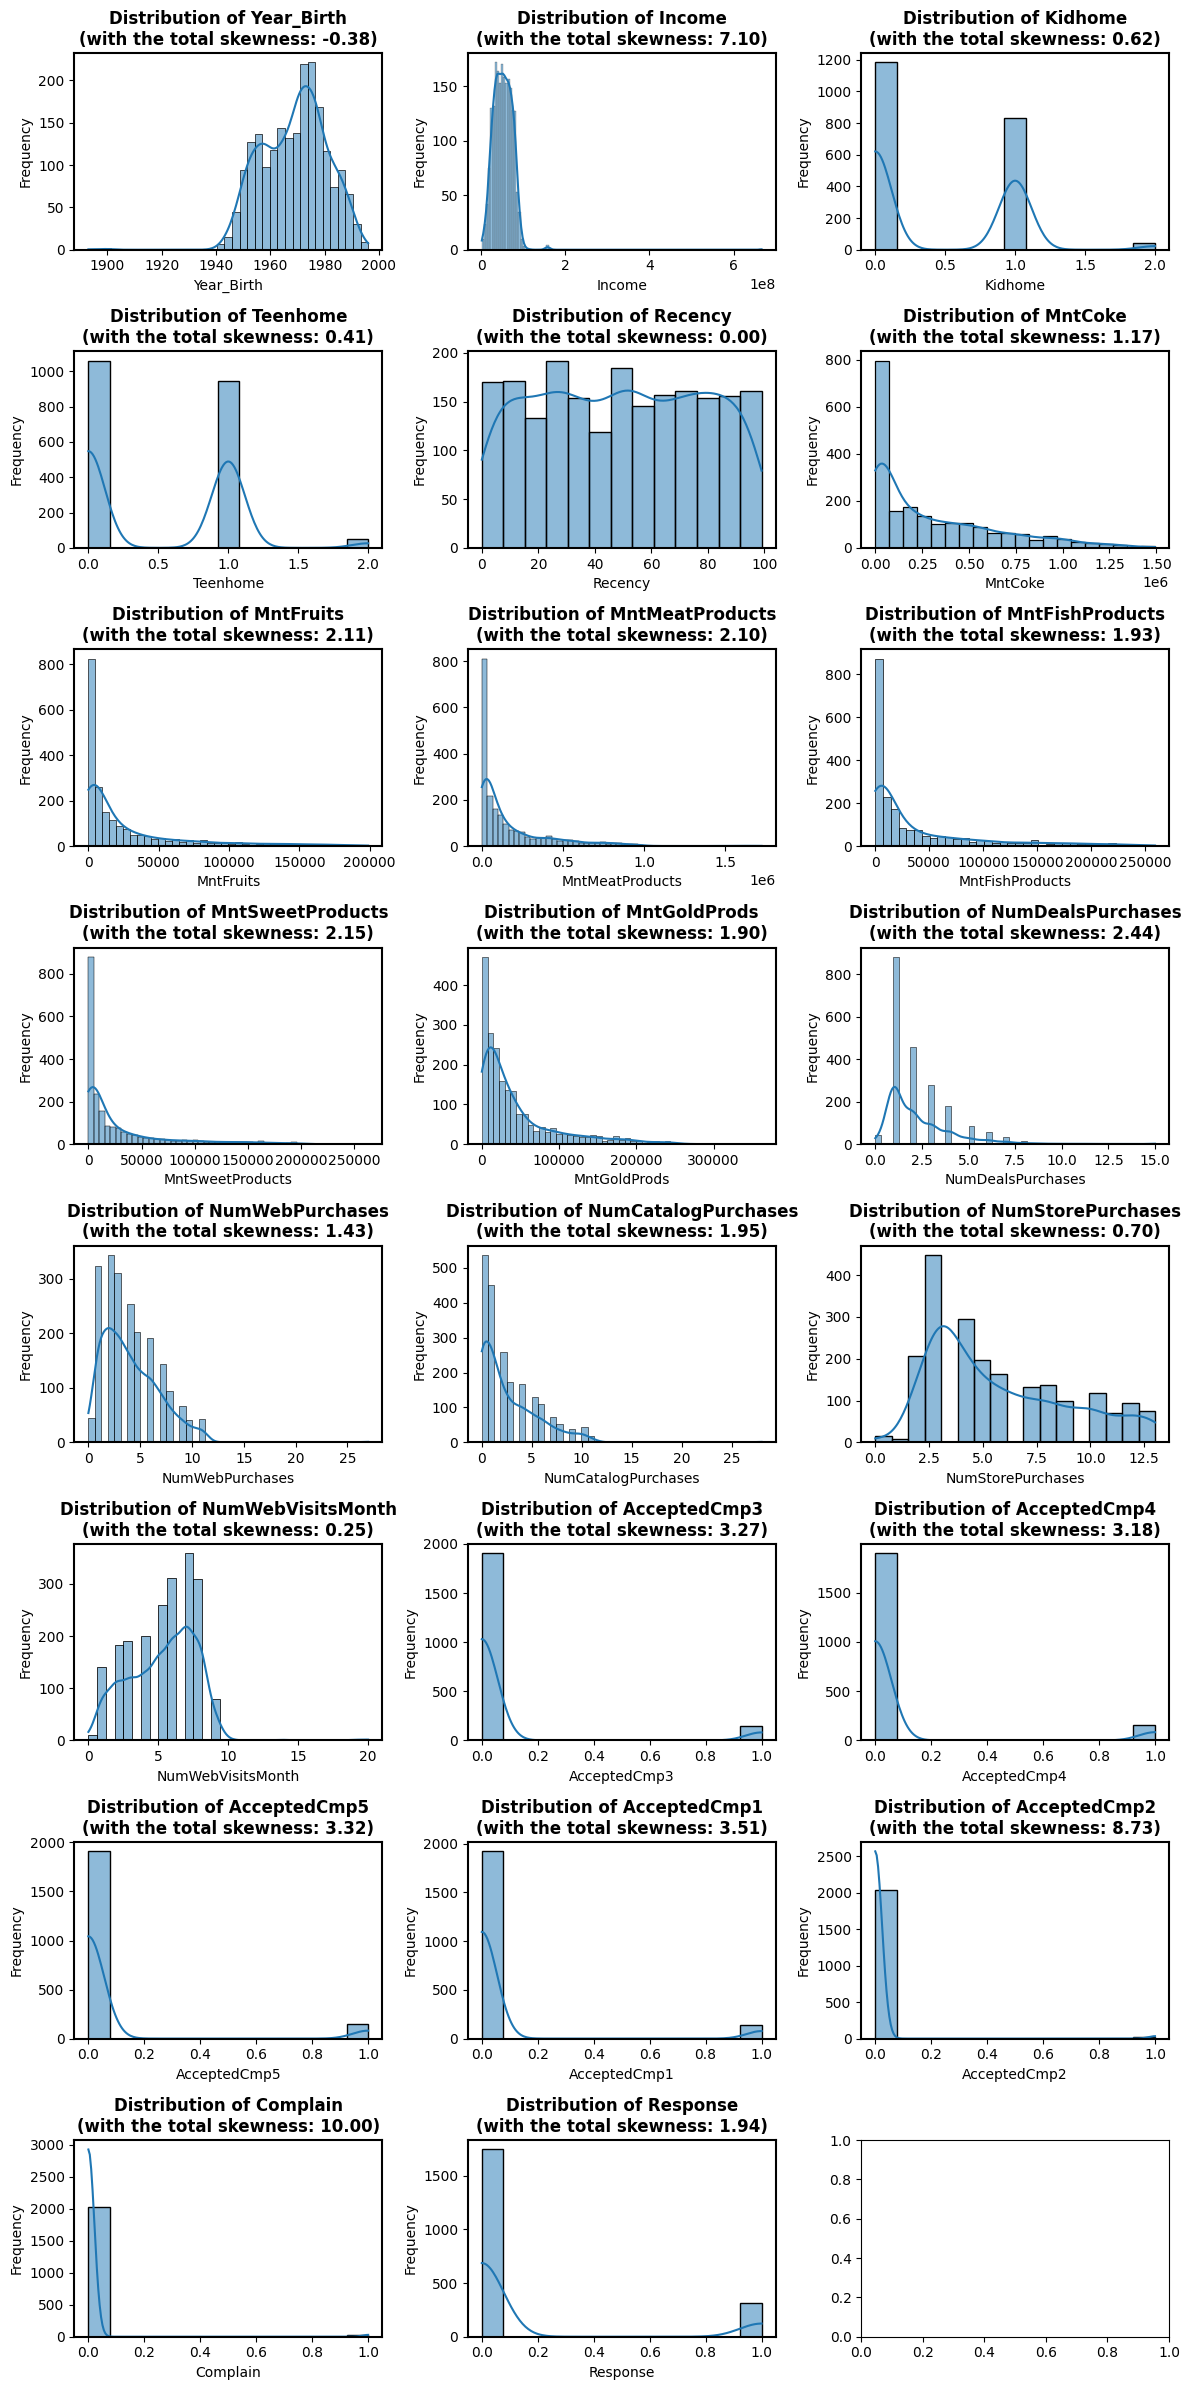

In [27]:

fig, ax = plt.subplots(8, 3, figsize=(12, 24)) 
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(num_var):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde=True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name}\n(with the total skewness: {skewness:.2f})', fontweight='bold')
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')

    # Adding border to each chart
    for spine in ax[i].spines.values():
        spine.set_edgecolor('black')  # Set border color
        spine.set_linewidth(1.5)      # Set border thickness

# Hide any empty subplots
for i in range(len(num_var), len(ax)):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


## Handling Outlier

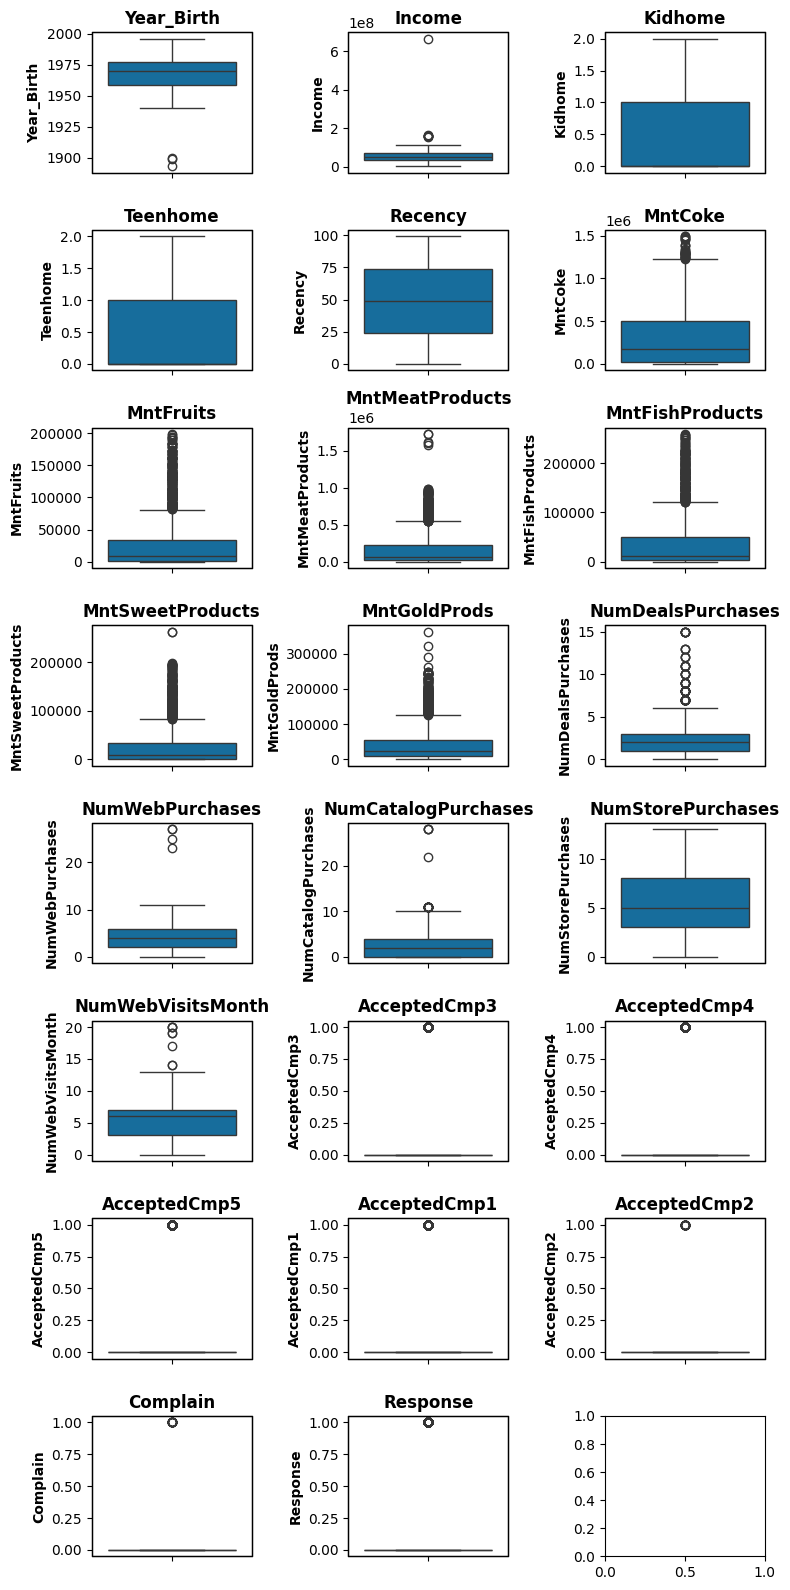

In [28]:
# Set a colorblind-friendly palette
num_var = df.select_dtypes(include=np.number)
palette = sns.color_palette("colorblind")

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(8, 3, figsize=(8, 16))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numerical feature column
for i, column_name in enumerate(num_var):
    # Create a vertical boxplot with the specified palette
    sns.boxplot(data=df, y=column_name, ax=axes[i], palette=palette)
    axes[i].set_title(f'{column_name}', fontweight='bold')
    axes[i].set_ylabel(column_name, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].patch.set_edgecolor('black')  # Set border color
    axes[i].patch.set_linewidth(1) 

# Hide any empty subplots
for i in range(len(num_var), 4):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The data distribution of the features seems fine, except for these two columns: `Year_Birth` and `Income`. Next, I will handle them.

### column: Year_Birth

In [29]:
sorted(df['Year_Birth'].unique())

[1893,
 1899,
 1900,
 1940,
 1941,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996]

The top 3 values of `Year_Birth` don't make sense. They might be typos made during data entry.

In [30]:
df[
 
   (df['Year_Birth']==1893) | 
   (df['Year_Birth']==1899) |
   (df['Year_Birth']==1900)
]

Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
192        1900        D3          Cerai  36640000.0        1         0   
239        1893        D3         Lajang  60182000.0        0         1   
339        1899        S3    Bertunangan  83532000.0        0         0   

    Dt_Customer  Recency  MntCoke  MntFruits  ...  NumCatalogPurchases  \
192  26-09-2013       99    15000       6000  ...                    1   
239  17-05-2014       23     8000          0  ...                    0   
339  26-09-2013       36   755000     144000  ...                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
192             0             0             0         1         0  
239             0             0             0         0         0  
339             1             0             0         0         0  

[3 rows x 26 columns]

### column: Income

In [31]:
sorted(df['Income'].unique(), reverse=True)

[666666000.0,
 162397000.0,
 160803000.0,
 157733000.0,
 157243000.0,
 157146000.0,
 156924000.0,
 153924000.0,
 113734000.0,
 105471000.0,
 102692000.0,
 102160000.0,
 101970000.0,
 98777000.0,
 96876000.0,
 96843000.0,
 96547000.0,
 95529000.0,
 95169000.0,
 94871000.0,
 94642000.0,
 94472000.0,
 94384000.0,
 93790000.0,
 93404000.0,
 93027000.0,
 92955000.0,
 92910000.0,
 92859000.0,
 92556000.0,
 92533000.0,
 92491000.0,
 92344000.0,
 92163000.0,
 91820000.0,
 91712000.0,
 91700000.0,
 91249000.0,
 91172000.0,
 91065000.0,
 90933000.0,
 90842000.0,
 90765000.0,
 90687000.0,
 90638000.0,
 90369000.0,
 90300000.0,
 90273000.0,
 90247000.0,
 90226000.0,
 90000000.0,
 89891000.0,
 89694000.0,
 89616000.0,
 89572000.0,
 89120000.0,
 89058000.0,
 88420000.0,
 88347000.0,
 88325000.0,
 88194000.0,
 88097000.0,
 87771000.0,
 87679000.0,
 87305000.0,
 87195000.0,
 87188000.0,
 87171000.0,
 87000000.0,
 86979000.0,
 86857000.0,
 86836000.0,
 86718000.0,
 86610000.0,
 86580000.0,
 86429000.0,

The highest `Income` is significantly larger than the rest, and the value '666666' seems suspicious.

In [32]:
print(f'Total rows before delete outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
nums = ['Income', 'Year_Birth']

for col in nums:
    zscore = abs(stats.zscore(df[col])) # calculate absolute z-score
    filtered_entries = (zscore < 3) & filtered_entries # keep if only absolute z-score is below 3
    
df = df[filtered_entries] # filter, keep if only absolute z-score is below 3

print(f'Total rows after delete outlier: {len(df)}')

Total rows before delete outlier: 2057
Total rows after delete outlier: 2046


# **Feature Engineering**

## column: Dt_Customer

In [33]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")


## column: `Years_Joined`

In [34]:
df['Years_Joined'] = (pd.to_datetime('2025-01-01') - df['Dt_Customer']).dt.days // 365


## column: `Days_Joined`

In [35]:
df['Days_Joined'] = (datetime.now() - df['Dt_Customer'])
df['Days_Joined'] = df['Days_Joined'].dt.days

## column: `Age`

In [36]:
df['Age'] = 2025 - df['Year_Birth']


## column: `Age_Group`

In [37]:
bins = [0, 35, 65, 100]
labels = [ 'Adult', 'Middle-Aged', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


## column: `Marital_Status`

In [38]:
df['Marital_Status'].unique()

array(['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda'],
      dtype=object)

In [39]:
df['Marital_Simplified'] = df['Marital_Status'].replace({
    'Menikah': 'Ever been married',
    'Bertunangan': 'Never been married',
    'Lajang': 'Never been married',
    'Cerai': 'Ever been married',
    'Janda': 'Ever been married',
    'Duda': 'Ever been married'
})

## column: `Income`

In [40]:
df['Income'].describe()

count    2.046000e+03
mean     5.167694e+07
std      2.058969e+07
min      1.730000e+06
25%      3.568250e+07
50%      5.153700e+07
75%      6.804675e+07
max      1.137340e+08
Name: Income, dtype: float64

I will make a Income_Group base on data quartile

In [41]:
bins = [1730000, 51684000, 68274000, 162397000]  # Min, 25%, 75%, Max
labels = ['Low', 'Medium', 'High']

# Create the Income_Group column
df['Income_Group'] = pd.cut(df['Income'], bins=bins, labels=labels, include_lowest=True)



## column: `Total_Amount`

In [42]:
df['Total_Amount'] = df[['MntCoke', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 
                           'MntGoldProds']].sum(axis=1)


In [43]:
df['Total_Amount'].describe()

count    2.046000e+03
mean     6.060518e+05
std      6.016510e+05
min      5.000000e+03
25%      6.900000e+04
50%      3.970000e+05
75%      1.044750e+06
max      2.525000e+06
Name: Total_Amount, dtype: float64

## column: `Recency_Group`

In [44]:
df['Recency'].describe()

count    2046.000000
mean       48.970186
std        28.971254
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

I will make `Recency_Group` from `Recency` quartile

In [45]:
bins = [0, 24, 49, 74, 99]
labels = ['Very Recent', 'Recent', 'Moderate', 'Long Ago']
df['Recency_Group'] = pd.cut(df['Recency'], bins=bins, labels=labels, include_lowest=True)


## column: `Total_Purchase`

In [46]:
df['Total_Purchases'] = (df['NumDealsPurchases'] + df['NumWebPurchases'] + 
                         df['NumCatalogPurchases'] + df['NumStorePurchases'])


## column: `Preferred_Channel`

In [47]:
df['Preferred_Channel'] = df[['NumDealsPurchases', 'NumWebPurchases', 
                               'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)


## column: `Total_Campaigns_Accepted`

In [48]:
df['Total_Campaigns_Accepted'] = (df['AcceptedCmp1'] + df['AcceptedCmp2'] + 
                                   df['AcceptedCmp3'] + df['AcceptedCmp4'] + 
                                   df['AcceptedCmp5'])


## column: `Conversion_Rate`

In [49]:
df['Conversion_Rate'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)

## column: `Total_Children`

In [50]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']

Let's check our new dataset.

In [51]:
df.head().T

0                    1  \
Year_Birth                               1957                 1954   
Education                                  S1                   S1   
Marital_Status                         Lajang               Lajang   
Income                             58138000.0           46344000.0   
Kidhome                                     0                    1   
Teenhome                                    0                    1   
Dt_Customer               2012-09-04 00:00:00  2014-03-08 00:00:00   
Recency                                    58                   38   
MntCoke                                635000                11000   
MntFruits                               88000                 1000   
MntMeatProducts                        546000                 6000   
MntFishProducts                        172000                 2000   
MntSweetProducts                        88000                 1000   
MntGoldProds                            88000                 6000   
NumDealsPurchases                           3                    2   
NumWebPurchases                             8                    1   
NumCatalogPurchases                        10                    1   
NumStorePurchases                           4                    2   
NumWebVisitsMonth                           7                    5   
AcceptedCmp3                                0                    0   
AcceptedCmp4                                0                    0   
AcceptedCmp5                                0                    0   
AcceptedCmp1                                0                    0   
AcceptedCmp2                                0                    0   
Complain                                    0                    0   
Response                                    1                    0   
Years_Joined                               12                   10   
Days_Joined                              4589                 4039   
Age                                        68                   71   
Age_Group                              Senior               Senior   
Marital_Simplified         Never been married   Never been married   
Income_Group                           Medium                  Low   
Total_Amount                          1617000                27000   
Recency_Group                        Moderate               Recent   
Total_Purchases                            25                    6   
Preferred_Channel         NumCatalogPurchases    NumDealsPurchases   
Total_Campaigns_Accepted                    0                    0   
Conversion_Rate                          3.57                  1.2   
Total_Children                              0                    2   

                                            2                    3  \
Year_Birth                               1965                 1984   
Education                                  S1                   S1   
Marital_Status                    Bertunangan          Bertunangan   
Income                             71613000.0           26646000.0   
Kidhome                                     0                    1   
Teenhome                                    0                    0   
Dt_Customer               2013-08-21 00:00:00  2014-02-10 00:00:00   
Recency                                    26                   26   
MntCoke                                426000                11000   
MntFruits                               49000                 4000   
MntMeatProducts                        127000                20000   
MntFishProducts                        111000                10000   
MntSweetProducts                        21000                 3000   
MntGoldProds                            42000                 5000   
NumDealsPurchases                           1                    2   
NumWebPurchases                             8                    2   
NumCatalogPurchases                         2        

In [52]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Years_Joined', 'Days_Joined',
       'Age', 'Age_Group', 'Marital_Simplified', 'Income_Group',
       'Total_Amount', 'Recency_Group', 'Total_Purchases', 'Preferred_Channel',
       'Total_Campaigns_Accepted', 'Conversion_Rate', 'Total_Children'],
      dtype='object')

# **Insight**

## 1. Total Spending by Category

### a. Total Number of Acceptances for Each Campaign

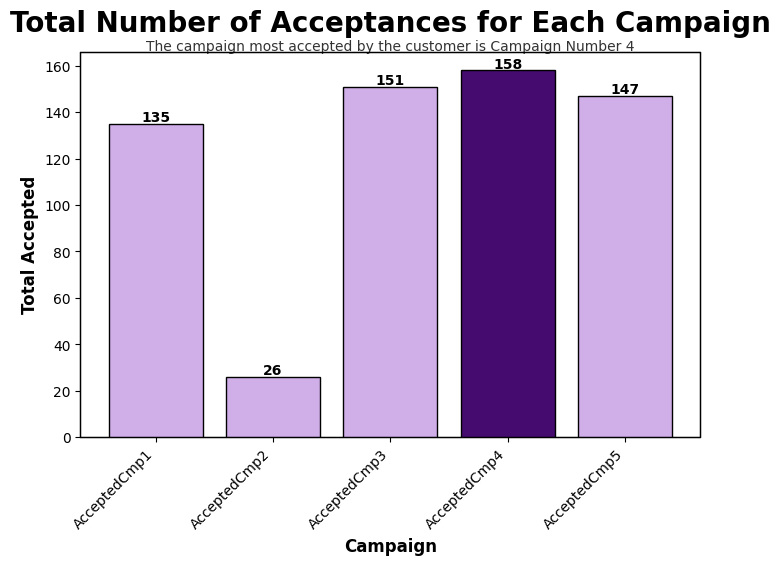

In [53]:

# Define campaign names
campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate total accepted per campaign
total_each_campaign = df[campaign].sum()

# Identify the highest accepted campaign
max_index = total_each_campaign.idxmax()
colors = ['#d0aee8' if category != max_index else '#450b6e' for category in total_each_campaign.index]  # Highlight max

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with different colors
bars = ax.bar(total_each_campaign.index, total_each_campaign, color=colors, edgecolor='black')

# Create the description text
desc = f"The campaign most accepted by the customer is Campaign Number {max_index[-1]}"
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x_center, ax.get_ylim()[1] + 1, desc, fontsize=10, alpha=0.8, ha='center')

# Add labels and title
ax.set_xlabel("Campaign", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Accepted", fontsize=12, fontweight='bold')
ax.set_title("Total Number of Acceptances for Each Campaign", fontsize=20, fontweight='bold', pad=15)

# Add campaign names to x-axis with proper rotation
ax.set_xticks(total_each_campaign.index)
ax.set_xticklabels(campaign, rotation=45, ha="right")

# Highlight the highest spending bar by adding an annotation
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{int(height)}", 
            ha='center', fontsize=10, fontweight='bold')

# Set plot border
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)

# Display the chart
plt.show()


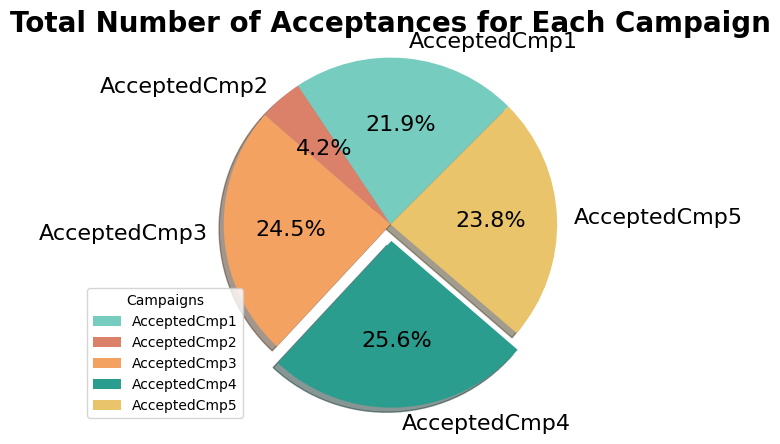

In [54]:
import matplotlib.pyplot as plt

# Define campaign names
campaign = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Calculate total accepted per campaign
total_each_campaign = df[campaign].sum()

# Identify the highest accepted campaign
max_index = total_each_campaign.idxmax()
colors = ['#76ccbf', '#db8069', '#f4a261', '#2a9d8f', '#e9c46a']  # Adjusted color scheme
explode = [0.1 if category == max_index else 0 for category in total_each_campaign.index]  # Highlight max

# Create the Pie Chart
plt.figure(figsize=(8, 5), facecolor='none')
plt.pie(total_each_campaign, labels=campaign, autopct='%1.1f%%', startangle=45, 
        shadow=True, colors=colors, explode=explode, textprops={'fontsize': 16})

# Title & Formatting
plt.title('Total Number of Acceptances for Each Campaign', fontsize=20, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.legend(title="Campaigns", loc='best')

# Show plot
plt.show()


### b. Total Spending by Category

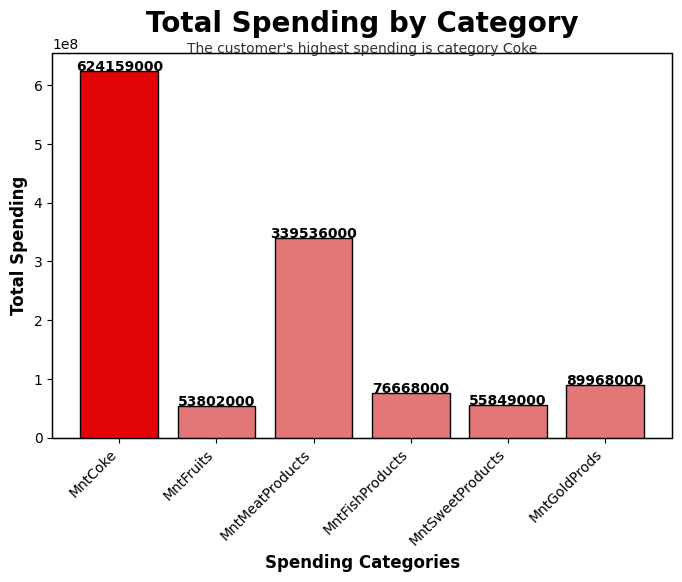

In [55]:

# Define the spending categories
spending_categories = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Calculate total spending per category
total_spending = df[spending_categories].sum()

# Identify the highest spending category
max_index = total_spending.idxmax()
colors = ['#e37676' if category != max_index else '#e30505' for category in spending_categories]  # Highlight max in gold

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with different colors
bars = ax.bar(spending_categories, total_spending, color=colors, edgecolor='black'
              )
desc = f"The customer's highest spending is category {max_index[3:]}"  # Remove first 3 characters
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x_center, ax.get_ylim()[1] + 1.5, desc, fontsize=10, alpha=0.8, ha='center')

# Add labels and title
ax.set_xlabel("Spending Categories", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Spending", fontsize=12, fontweight='bold')
ax.set_title("Total Spending by Category", fontsize=20, fontweight='bold', pad=15)
ax.set_xticklabels(spending_categories, rotation=45, ha="right")

# Highlight the highest spending bar by adding an annotation
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 100, f"{int(height)}", 
            ha='center', fontsize=10, fontweight='bold')

# Set plot border
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)

# Display the chart
plt.show()


### c. Total Purchase by Channel

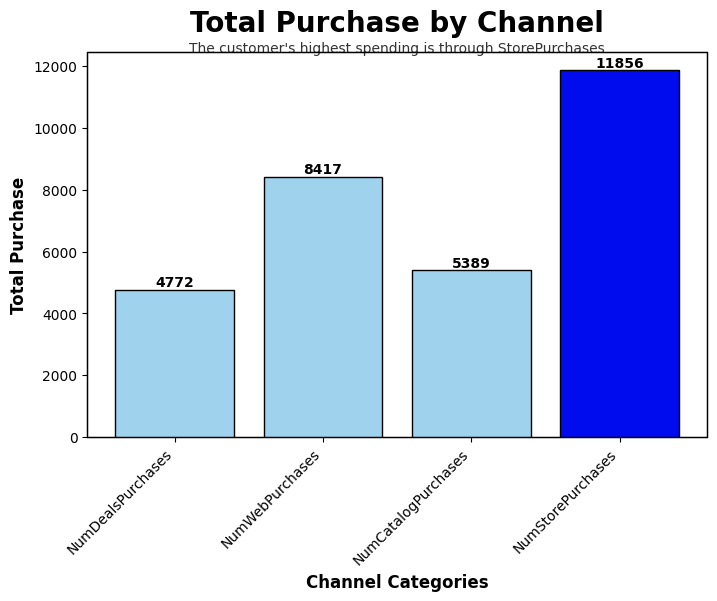

In [56]:

# Define the spending categories (Make sure this is correct)
channel_categories = [ 'NumDealsPurchases', 'NumWebPurchases', 
                      'NumCatalogPurchases', 'NumStorePurchases']

# Calculate total spending per category (assuming df contains the necessary data)
total_purchase = df[channel_categories].sum()

# Identify the highest spending category
max_index = total_purchase.idxmax()
colors = ['#9fd3ed' if category != max_index else '#000ced' for category in channel_categories]  # Highlight max category in blue

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with different colors
bars = ax.bar(channel_categories, total_purchase, color=colors, edgecolor='black')

# Create the description text
desc = f"The customer's highest spending is through {max_index[3:]}"  # Remove first 3 characters
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x_center, ax.get_ylim()[1] + 1, desc, fontsize=10, alpha=0.8, ha='center')

# Add labels and title
ax.set_xlabel("Channel Categories", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Purchase", fontsize=12, fontweight='bold')
ax.set_title("Total Purchase by Channel", fontsize=20, fontweight='bold', pad=15)
ax.set_xticklabels(channel_categories, rotation=45, ha="right")

# Highlight the highest spending bar by adding an annotation
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 100, f"{int(height)}", 
            ha='center', fontsize=10, fontweight='bold')

# Set plot border
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)

# Display the chart
plt.show()


### d. Total Purchase by Marital Status

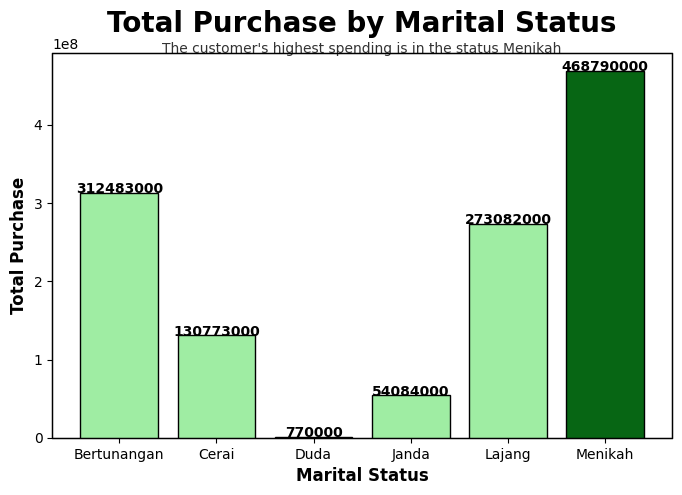

In [57]:
# Group the data and calculate total spending per category
grouped = df.groupby('Marital_Status')['Total_Amount'].sum()

# Identify the highest spending category
max_index = grouped.idxmax()

# Create a color list where the bar corresponding to the highest spending category is blue
colors = ['#076614' if status == max_index else '#9feda3' for status in grouped.index]

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bar chart with different colors
bars = ax.bar(grouped.index, grouped.values, color=colors, edgecolor='black')

# Create the description text
desc = f"The customer's highest spending is in the status {max_index}"  # Fixed the slicing issue
x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
ax.text(x_center, ax.get_ylim()[1] + 100, desc, fontsize=10, alpha=0.8, ha='center')

# Add labels and title
ax.set_xlabel("Marital Status", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Purchase", fontsize=12, fontweight='bold')
ax.set_title("Total Purchase by Marital Status", fontsize=20, fontweight='bold', pad=15)

# Highlight the highest spending bar by adding an annotation
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 100, f"{int(height)}", 
            ha='center', fontsize=10, fontweight='bold')

# Set plot border
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)

# Display the chart
plt.show()


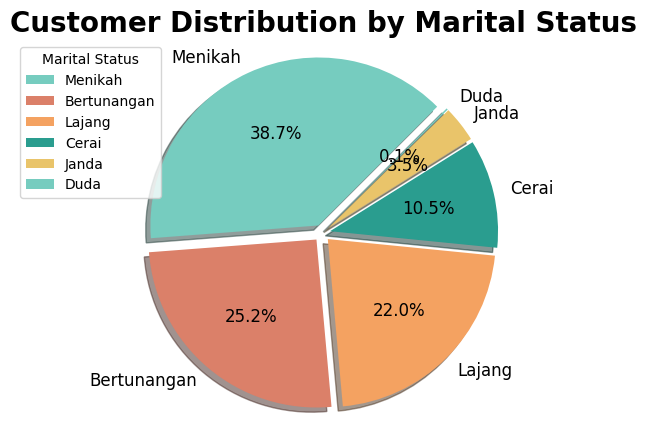

In [58]:

# Count customers by marital status
marital_counts = df['Marital_Status'].value_counts()

# Define custom labels, colors, and explode effect
my_labels = marital_counts.index
my_colors = ['#76ccbf', '#db8069', '#f4a261', '#2a9d8f', '#e9c46a']  # Adjust colors if needed
my_explode = [0.05] * len(my_labels)  # Slight explode effect for all slices

# Create the Pie Chart
plt.figure(figsize=(8, 5), facecolor='none')
plt.pie(marital_counts, labels=my_labels, autopct='%1.1f%%', startangle=45, 
        shadow=True, colors=my_colors[:len(my_labels)], explode=my_explode, 
        textprops={'fontsize': 12})

# Title & Formatting
plt.title('Customer Distribution by Marital Status', fontsize=20, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.legend(title="Marital Status", loc='best')

# Show plot
plt.show()


### e. Total Spending by Complain

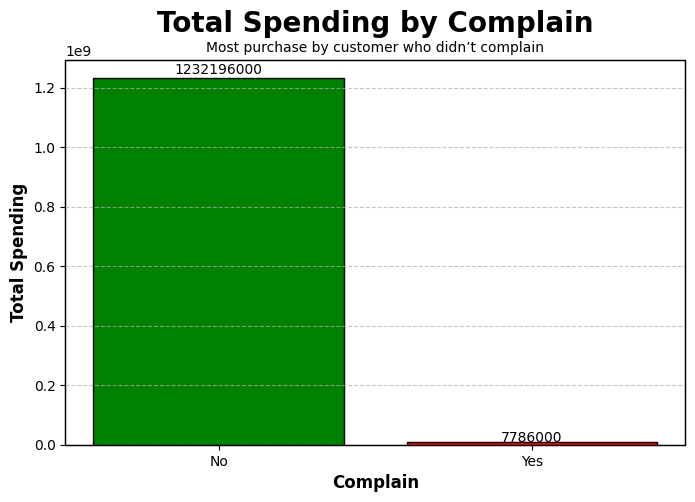

In [59]:

# Group data
grouped = df.groupby('Complain')['Total_Amount'].sum()

# Define colors for bars
colors = ['green', 'red']  # Green for no complaint, red for complaint

# Create Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

# Create Bar Chart
bars = ax.bar(grouped.index, grouped, color=colors, edgecolor='black')

# Labels & Title
ax.set_xlabel("Complain", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Spending", fontsize=12, fontweight='bold')
ax.set_title("Total Spending by Complain", fontsize=20, fontweight='bold', pad=20)

# Add subtitle below the title
ax.text(0.5, 1.02, "Most purchase by customer who didn’t complain", 
        fontsize=10,  ha='center', transform=ax.transAxes)

# Fix X-tick labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Add Data Labels Above Bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + (0.01 * height), 
            f"{int(height)}", ha='center', fontsize=10)

# Edge & Grid Styling
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show Plot
plt.show()


### f. Complain Percentage

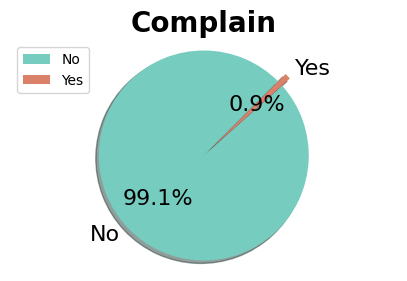

In [60]:
plt.figure(figsize=(5,3), facecolor='none')
my_labels = 'No','Yes'
my_colors = ['#76ccbf','#db8069']
my_explode = (0, 0.1)
plt.pie(df['Complain'].value_counts(), labels=my_labels, autopct='%1.1f%%', startangle=45, shadow = True, colors=my_colors, explode=my_explode, textprops={'fontsize': 16})
plt.title('Complain', fontsize=20, fontweight='bold')
plt.axis('equal')
plt.legend()
plt.show()

### g. Complaints by Preferred Purchase Channel

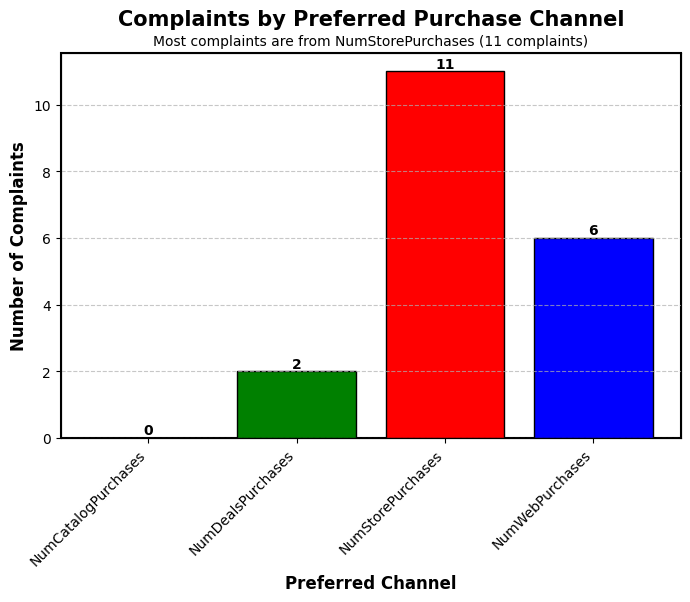

In [61]:

# Group by 'Preferred_Channel' and sum 'Complain' (to count complaints per channel)
complain_counts = df.groupby('Preferred_Channel')['Complain'].sum()

# Find the channel with the highest complaints
max_channel = complain_counts.idxmax()
max_value = complain_counts.max()

# Define colors (optional)
colors = ['blue', 'green', 'red']

# Create Figure and Axes
fig, ax = plt.subplots(figsize=(8, 5))

# Create Bar Chart
bars = ax.bar(complain_counts.index, complain_counts, color=colors, edgecolor='black')

# Labels & Title
ax.set_xlabel("Preferred Channel", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of Complaints", fontsize=12, fontweight='bold')
ax.set_title("Complaints by Preferred Purchase Channel", fontsize=15, fontweight='bold', pad=20)

# Add subtitle below the title
ax.text(0.5, 1.02, f"Most complaints are from {max_channel} ({max_value} complaints)", 
        fontsize=10, ha='center', transform=ax.transAxes)

# Add Data Labels Above Bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.1, 
            f"{int(height)}", ha='center', fontsize=10, fontweight='bold')

# Grid & Formatting
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_xticklabels(complain_counts.index, rotation=45, ha="right")  # Rotate labels for clarity

# Add border to the entire chart
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

# Show Plot
plt.show()


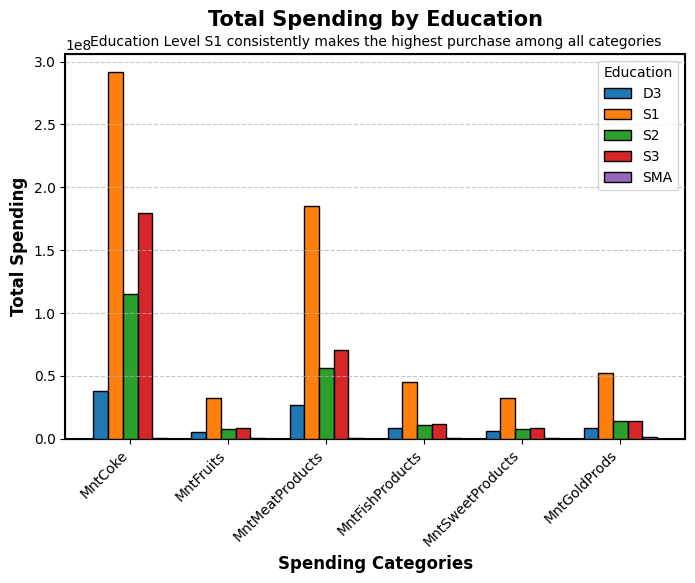

In [62]:

# Select spending columns
spending_cols = ['MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Choose group column (Education or Marital_Status)
group_col = 'Education'  # Change to 'Marital_Status' if needed
grouped = df.groupby(group_col)[spending_cols].sum()

# Plot grouped (unstacked) bar chart
fig, ax = plt.subplots(figsize=(8, 5))

# Set width of bars and x positions
bar_width = 0.15
x = np.arange(len(spending_cols))

# Plot each group as a separate bar
for i, category in enumerate(grouped.index):
    ax.bar(x + i * bar_width, grouped.loc[category], width=bar_width, label=category, edgecolor='black')

# Labels & Title
ax.set_xlabel("Spending Categories", fontsize=12, fontweight='bold')
ax.set_ylabel("Total Spending", fontsize=12, fontweight='bold')
ax.set_title(f"Total Spending by {group_col}", fontsize=15, fontweight='bold', pad=20)

# Add subtitle below the title
ax.text(0.5, 1.02, "Education Level S1 consistently makes the highest purchase among all categories",
        fontsize=10, ha='center', transform=ax.transAxes)

# X-axis ticks & legend
ax.set_xticks(x + (bar_width * (len(grouped.index) - 1) / 2))  # Center x labels
ax.set_xticklabels(spending_cols, rotation=45, ha="right")
ax.legend(title=group_col)

# Grid for readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add border to the entire chart
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

# Show plot
plt.show()


### h. Customer Distribution by Education Level

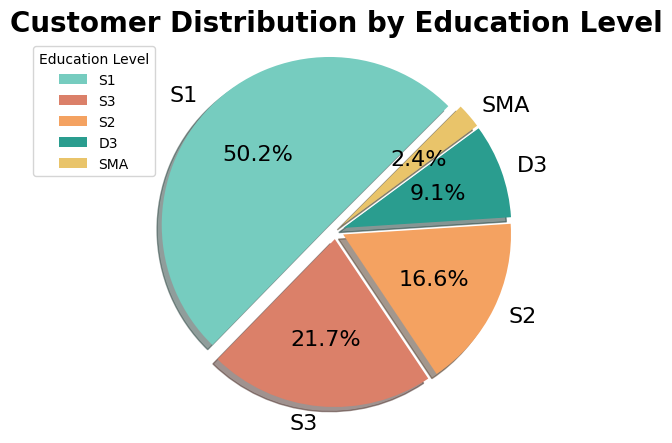

In [63]:

# Count customers by education level
education_counts = df['Education'].value_counts()

# Define custom labels, colors, and explode effect
my_labels = education_counts.index
my_colors = ['#76ccbf', '#db8069', '#f4a261', '#2a9d8f', '#e9c46a']  # Adjusted for more categories
my_explode = [0.05] * len(my_labels)  # Slight explode effect for all slices

# Create the Pie Chart
plt.figure(figsize=(8, 5), facecolor='none')
plt.pie(education_counts, labels=my_labels, autopct='%1.1f%%', startangle=45, 
        shadow=True, colors=my_colors[:len(my_labels)], explode=my_explode, 
        textprops={'fontsize': 16})

# Title & Formatting
plt.title('Customer Distribution by Education Level', fontsize=20, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.legend(title="Education Level", loc='best')

# Show plot
plt.show()

## 2. Insight for Each Campaign

### a. Total Accepted Campaign

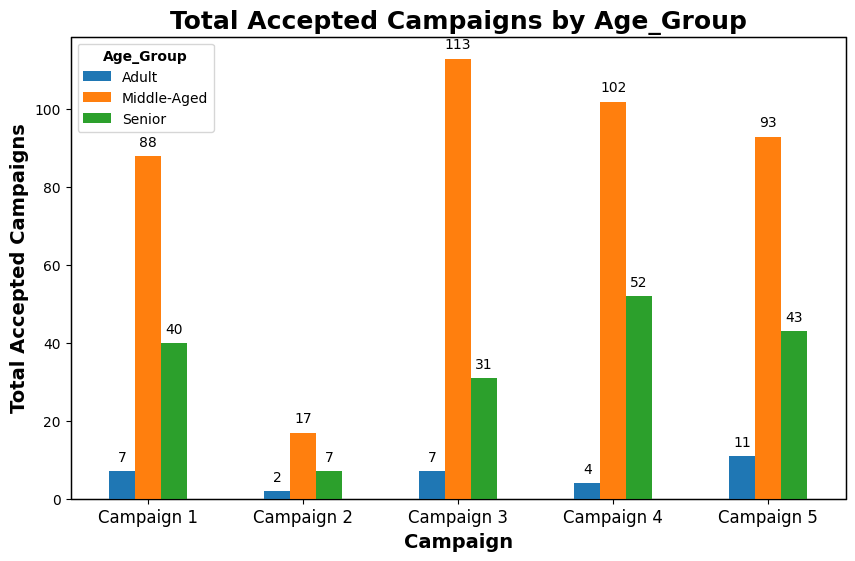

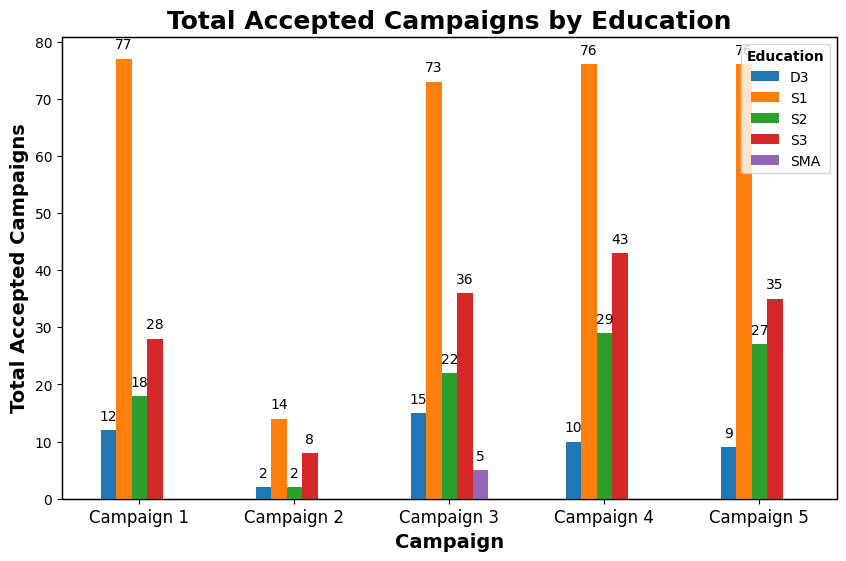

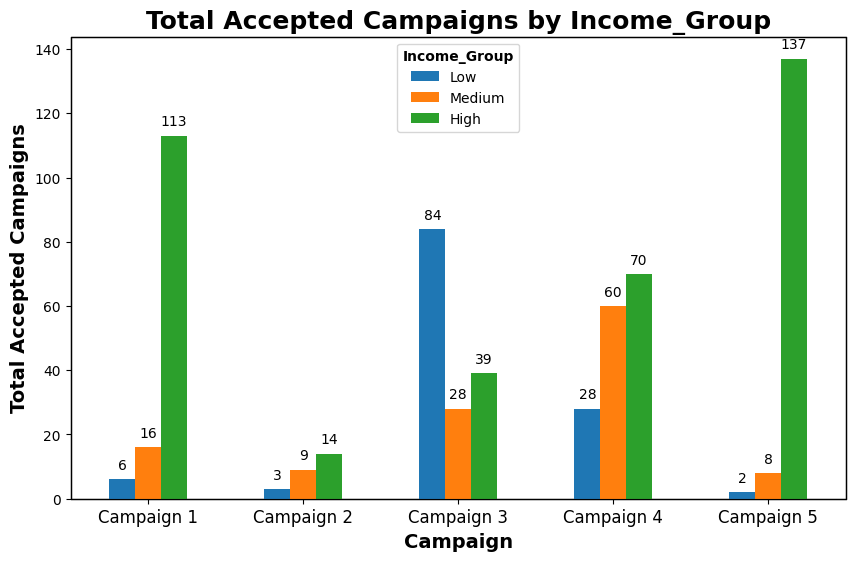

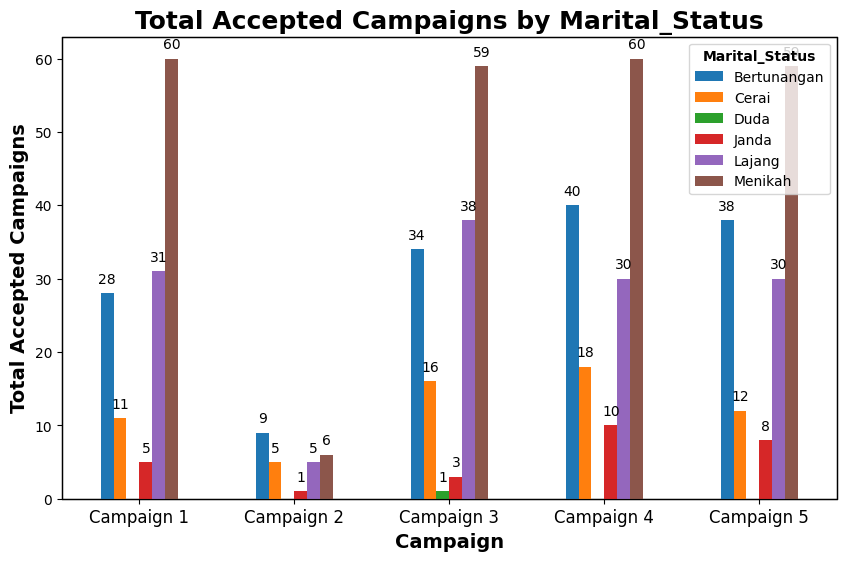

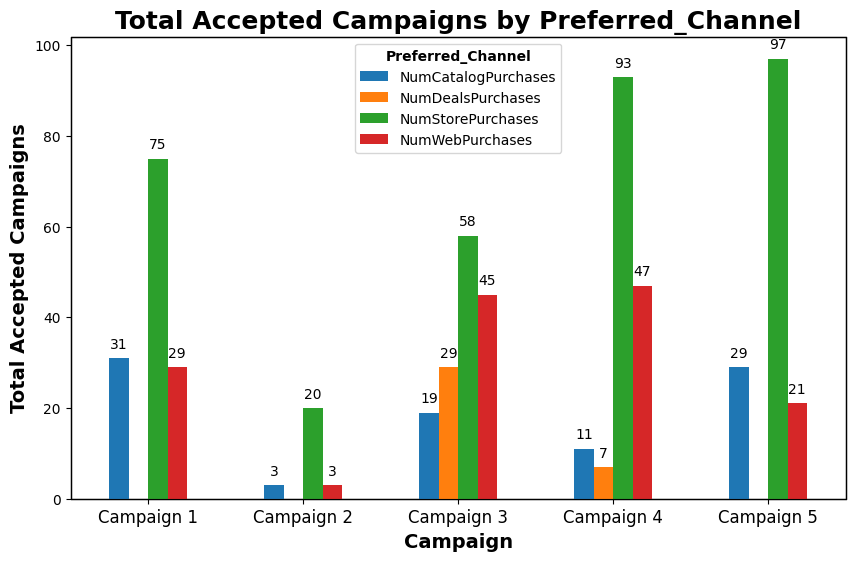

In [64]:

# Define grouping columns
grouping_columns = ['Age_Group', 'Education', 'Income_Group', 'Marital_Status', 'Preferred_Channel']
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Iterate over each grouping column
for group_col in grouping_columns:
    # Group by the current categorical variable and sum the accepted campaigns
    grouped_data = df.groupby(group_col)[campaign_columns].sum().fillna(0)

    # Transpose for visualization (campaigns on x-axis)
    ax = grouped_data.T.plot(kind='bar', stacked=False, figsize=(10, 6))

    # Set title and labels
    ax.set_title(f'Total Accepted Campaigns by {group_col}', fontweight='bold', fontsize=18)
    ax.set_xlabel('Campaign', fontweight='bold', fontsize=14)
    ax.set_ylabel('Total Accepted Campaigns', fontweight='bold', fontsize=14)

    # Set border for the plot background
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1)

    # Customize x-axis labels
    plt.xticks(range(len(campaign_columns)), 
               ['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5'], 
               rotation=0, fontsize=12)

    # Add labels on top of each bar
    for p in ax.patches:
        if p.get_height() > 0:  # Avoid placing text on empty bars
            ax.annotate(f'{int(p.get_height())}', 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', 
                        xytext=(0, 5), textcoords='offset points', fontsize=10)

    # Add legend with bold title
    ax.legend(title=group_col, title_fontproperties=FontProperties(weight='bold'))

    # Show the plot
    plt.show()


### b. Conversion Rate Each Age Group

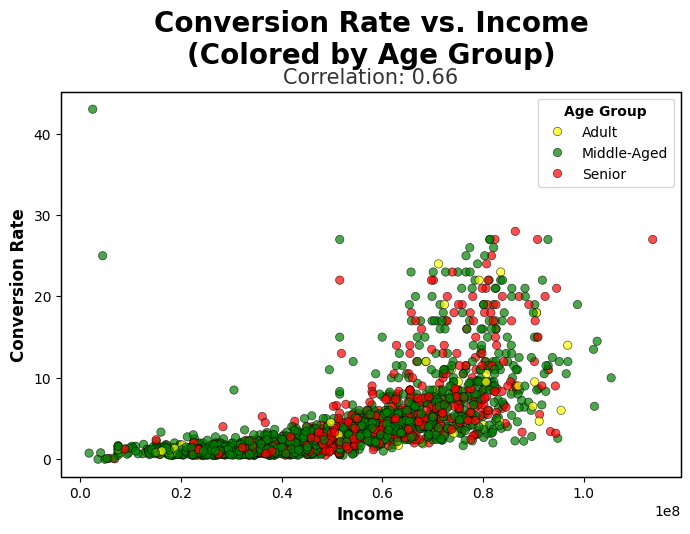

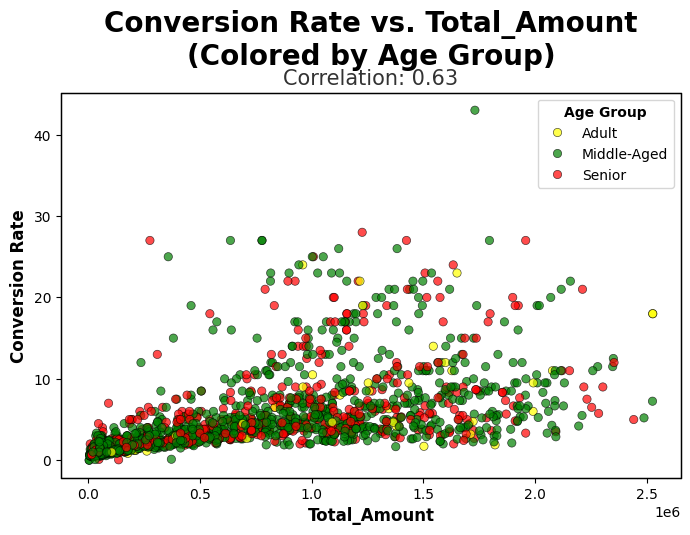

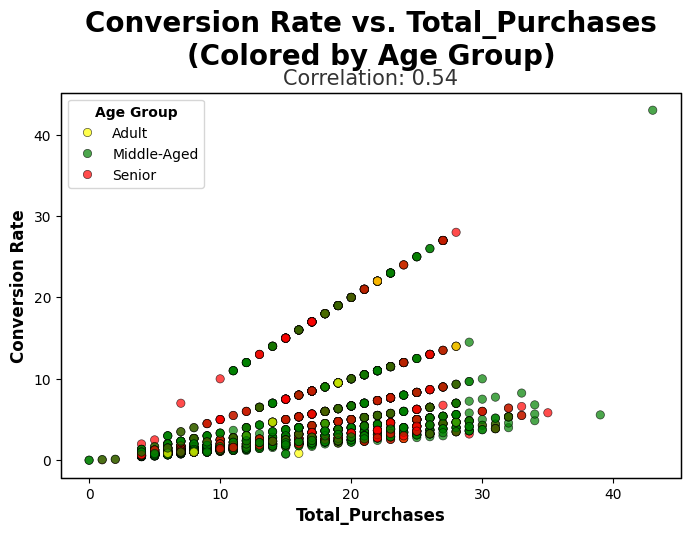

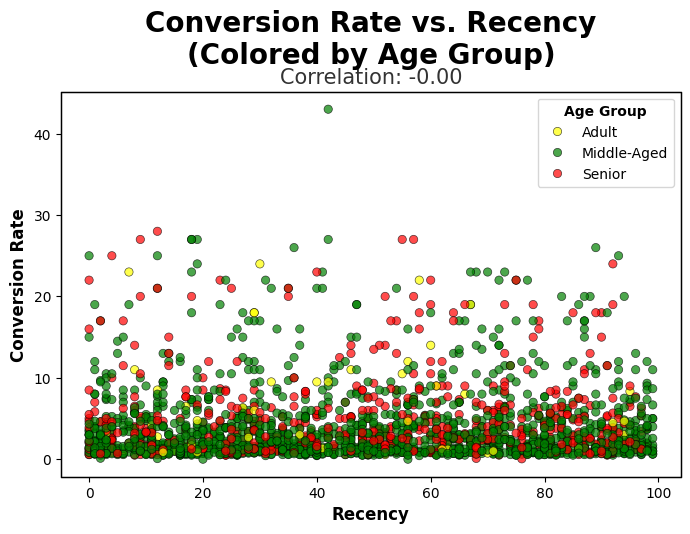

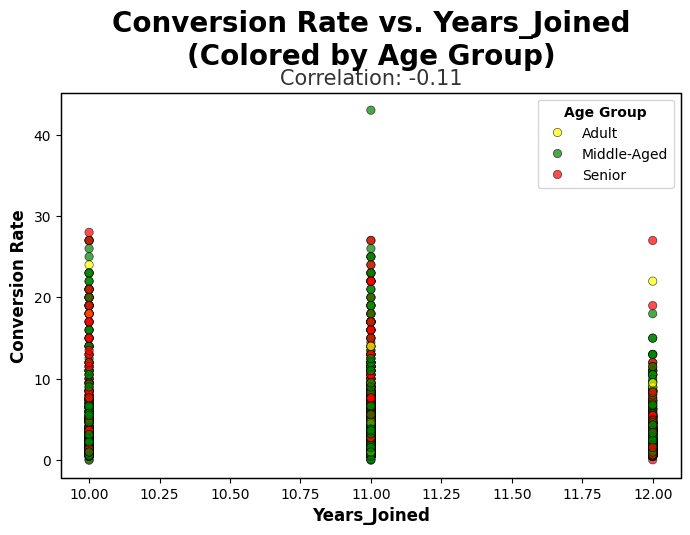

In [65]:

# Define numerical features to iterate over
numerical_features = ['Income', 'Total_Amount', 'Total_Purchases', 'Recency', 'Years_Joined']

# Define color mapping for Age Groups
age_colors = {'Adult': 'yellow', 'Middle-Aged': 'green', 'Senior': 'red'}

# Loop through each numerical feature to create scatter plots
for feature in numerical_features:
    # Compute correlation matrix
    corr_matrix = df[[feature, 'Conversion_Rate']].corr()
    correlation_value = f"{corr_matrix.iloc[0, 1]:.2f}"  # Extract and format correlation value
    
    # Set figure size
    fig, ax = plt.subplots(figsize=(8, 5))
    
    # Scatter plot
    sns.scatterplot(data=df, x=feature, y='Conversion_Rate', 
                    hue='Age_Group', palette=age_colors, edgecolor='black', alpha=0.7)
    
    # Set labels and title
    ax.set_xlabel(feature, fontsize=12, fontweight='bold')
    ax.set_ylabel("Conversion Rate", fontsize=12, fontweight='bold')
    ax.set_title(f"Conversion Rate vs. {feature}\n(Colored by Age Group)", fontsize=20, fontweight='bold', pad=20, ha='center')
    
    # Add correlation value as text annotation
    x_center = (ax.get_xlim()[0] + ax.get_xlim()[1]) / 2
    ax.text(x_center, ax.get_ylim()[1] + 1, f'Correlation: {correlation_value}', 
            fontsize=15, alpha=0.8, ha='center')

    # Set plot border
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1)

    # Customize legend
    ax.legend(title='Age Group', title_fontproperties=FontProperties(weight='bold'))
    
    # Show the plot
    plt.show()


In [66]:
num_column = ['Total_Amount', 'Response', 'Income', 'Total_Purchases','Total_Children']
cat_column = ['Age_Group']

column = num_column + cat_column

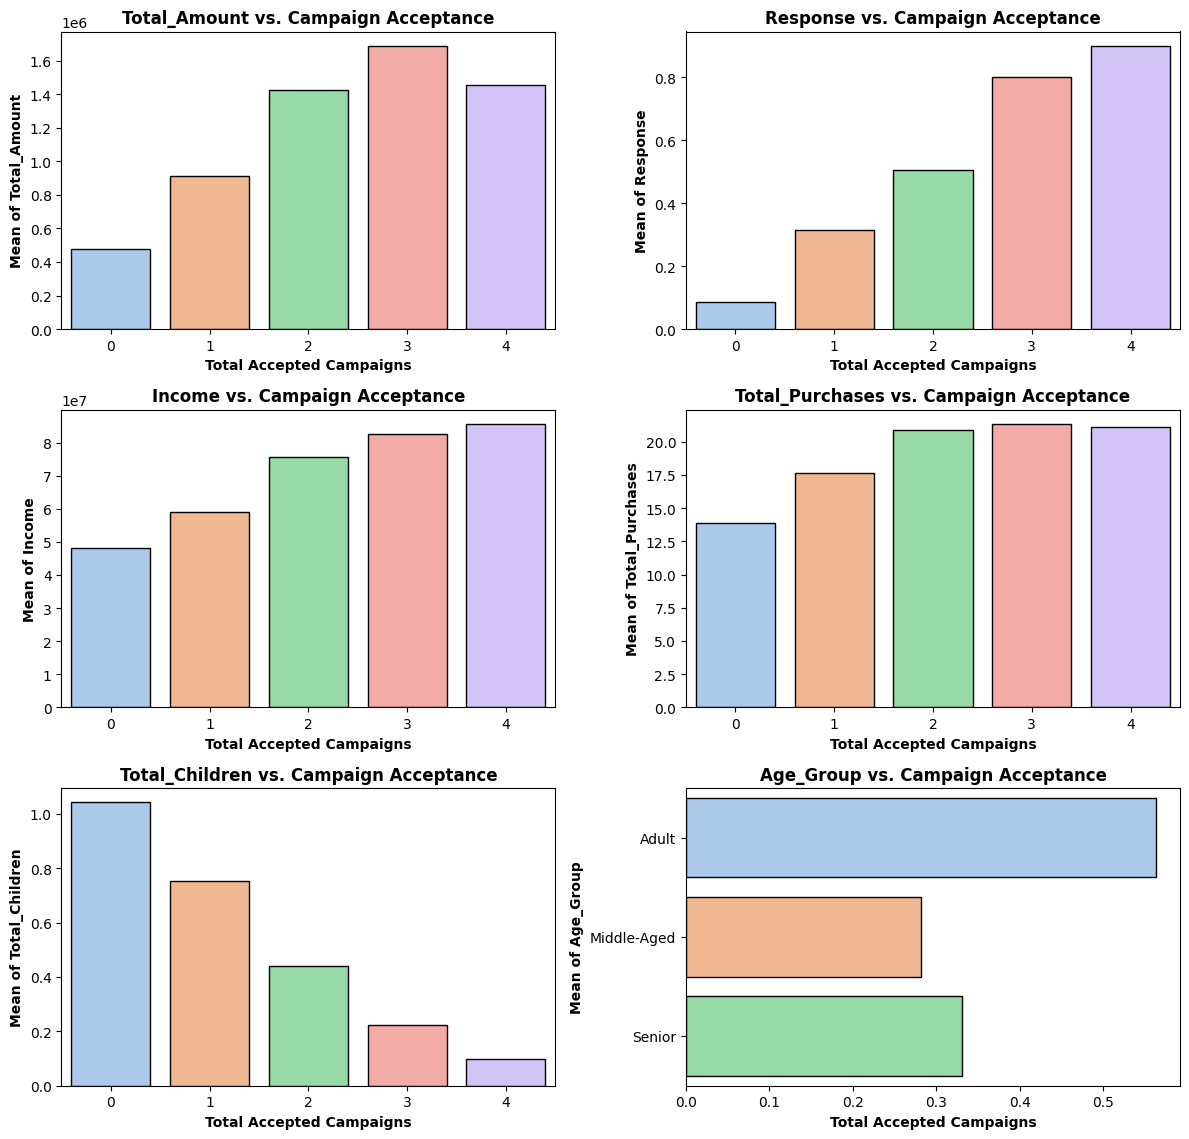

In [67]:

# Set figure size
plt.figure(figsize=(12, 15))

# Loop through the selected columns
for i, col in enumerate(column, 1):  # Assuming 'column' is a list of column names
    plt.subplot(4, 2, i)  # Create subplots in a 4-row, 2-column layout
    
    # Bar plot with borders and no error bars
    sns.barplot(x=df['Total_Campaigns_Accepted'], y=df[col], 
                palette='pastel', edgecolor='black', linewidth=1, ci=None)
    
    plt.ylabel(f'Mean of {col}', fontweight='bold')
    plt.xlabel('Total Accepted Campaigns', fontweight='bold')  # Add x-axis label
    plt.title(f'{col} vs. Campaign Acceptance', fontsize=12, fontweight='bold')  # Bold title for clarity

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()



# **Exploratory Data Analysis**

In [68]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Years_Joined', 'Days_Joined',
       'Age', 'Age_Group', 'Marital_Simplified', 'Income_Group',
       'Total_Amount', 'Recency_Group', 'Total_Purchases', 'Preferred_Channel',
       'Total_Campaigns_Accepted', 'Conversion_Rate', 'Total_Children'],
      dtype='object')

In [69]:
# redefine the data type
cat_var = df.select_dtypes(include=['object', 'category']).columns

# set the numerical columns
import numpy as np
num_var = df.select_dtypes(include=np.number)

In [70]:
cat_var

Index(['Education', 'Marital_Status', 'Age_Group', 'Marital_Simplified',
       'Income_Group', 'Recency_Group', 'Preferred_Channel'],
      dtype='object')

In [71]:
num_var.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Years_Joined', 'Days_Joined',
       'Age', 'Total_Amount', 'Total_Purchases', 'Total_Campaigns_Accepted',
       'Conversion_Rate', 'Total_Children'],
      dtype='object')

## Multivariate Analysis

## numerical

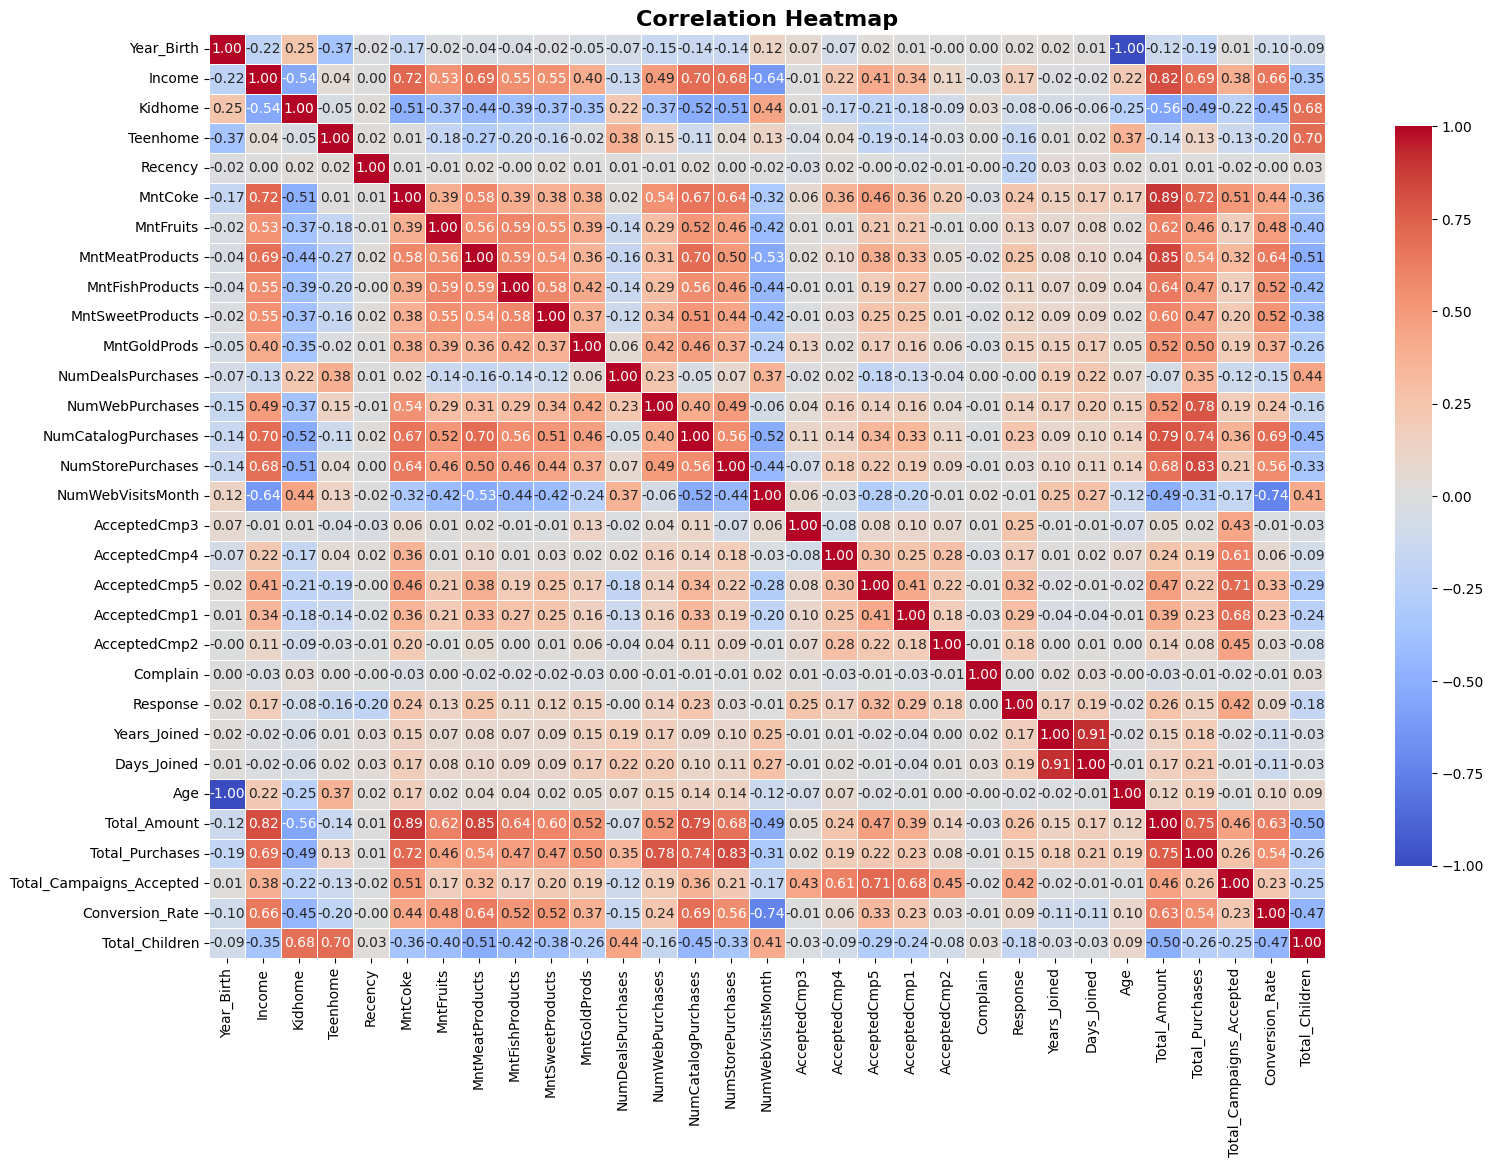

In [72]:

correlation_matrix = num_var.corr()

# Set the size of the figure
plt.figure(figsize=(18, 12))

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,       # Show correlation values
            fmt=".2f",        # Format the numbers to 2 decimal places
            cmap="coolwarm",  # Colormap
            vmin=-1, vmax=1,  # Set the range of correlations
            linewidths=0.5,   # Add spacing between cells
            cbar_kws={"shrink": 0.8})  # Shrink the color bar

# Add a title
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Show the plot
plt.show()


## categorical 

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency


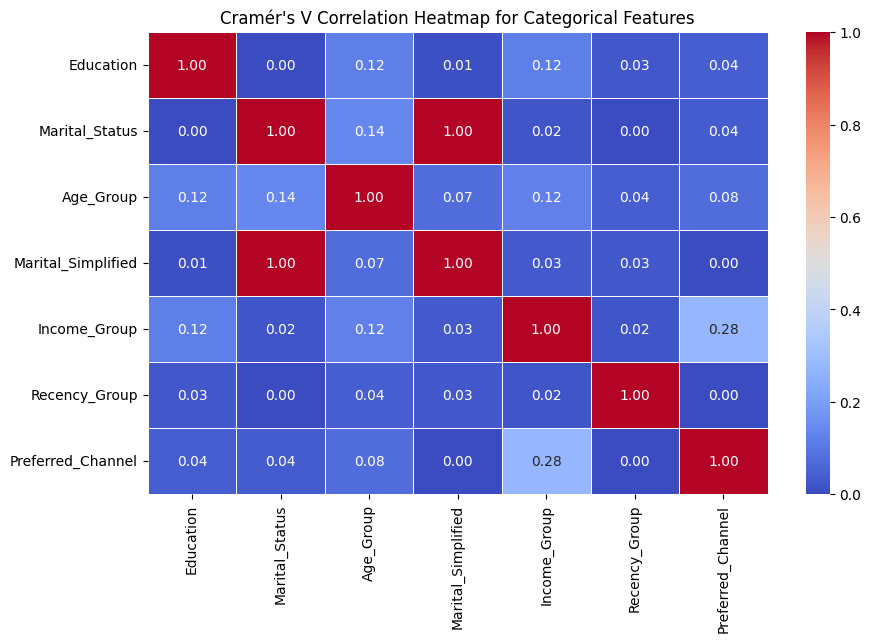

In [74]:

# Define function to compute Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    r_corr = r - ((r - 1) ** 2) / (n - 1)
    k_corr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((k_corr - 1), (r_corr - 1)))

# Select categorical features
categorical_features = cat_var

# Compute correlation matrix
corr_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))), 
                           index=categorical_features, columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            corr_matrix.loc[col1, col2] = 1  # Perfect correlation with itself
        else:
            corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Correlation Heatmap for Categorical Features")
plt.show()


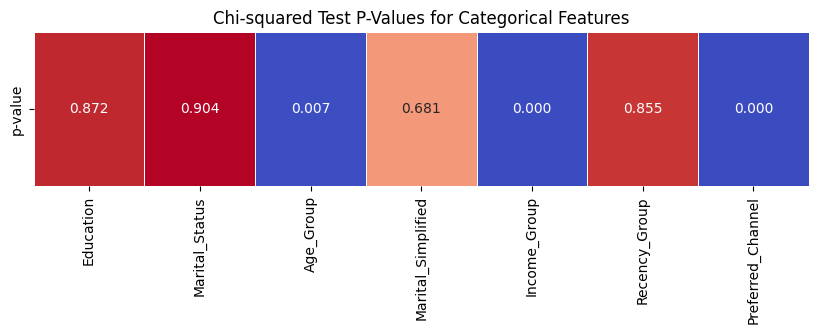

In [75]:

p_values = {}

for col in cat_var:
    # Create the contingency table
    contingency_table = pd.crosstab(df['Total_Campaigns_Accepted'], df[col])
    
    # Perform the Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store the p-value
    p_values[col] = p

# Convert the p-values dictionary to a DataFrame for visualization
p_values_df = pd.DataFrame(p_values, index=['p-value'])

# Plot heatmap
plt.figure(figsize=(10, 2))  # Adjust figure size
sns.heatmap(p_values_df, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".3f", cbar=False)

# Add title
plt.title("Chi-squared Test P-Values for Categorical Features")

# Show plot
plt.show()


## Univariate Analysis

In [76]:
num_var.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntCoke',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Years_Joined', 'Days_Joined',
       'Age', 'Total_Amount', 'Total_Purchases', 'Total_Campaigns_Accepted',
       'Conversion_Rate', 'Total_Children'],
      dtype='object')

### categorical

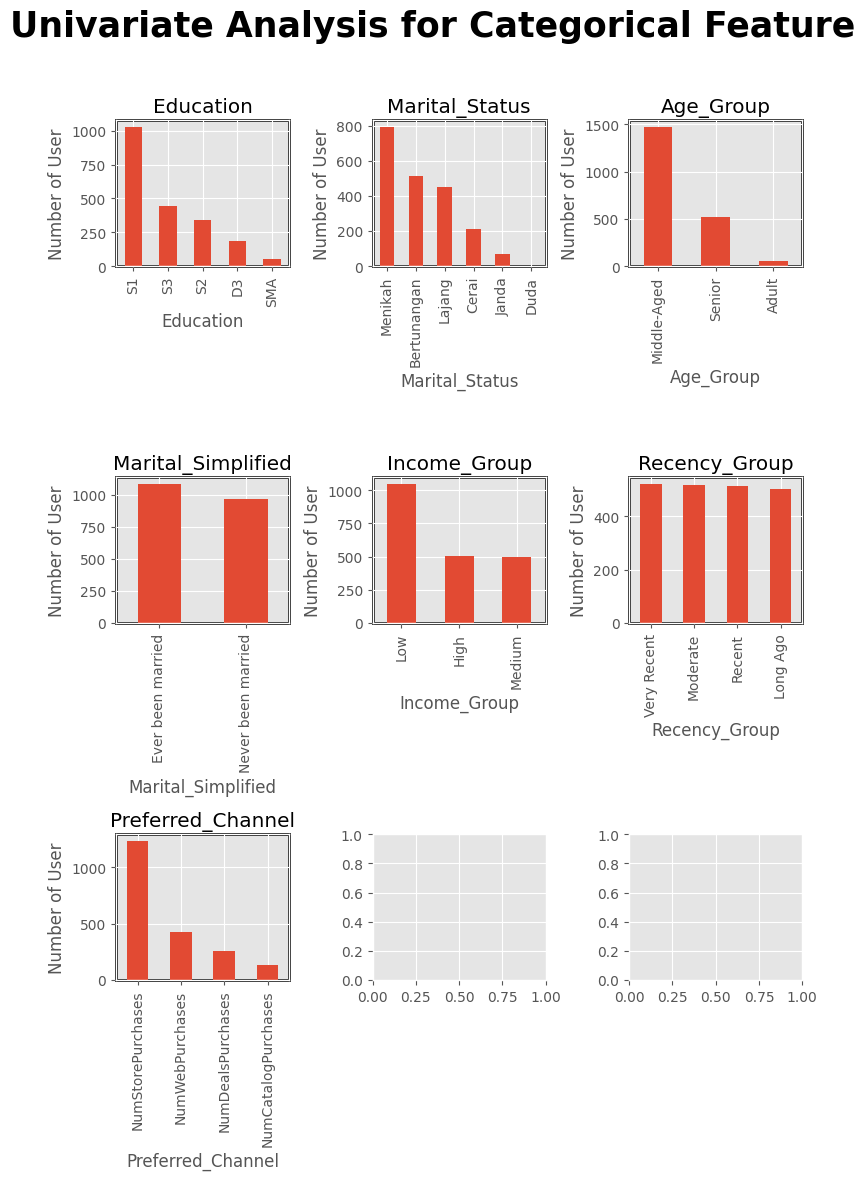

In [77]:

# Set style for plots
plt.style.use('ggplot')

# Number of rows and columns for the subplot grid
n_rows, n_cols = 3, 3

# Create the figure and subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8, 12))
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Title for the entire figure
fig.suptitle('Univariate Analysis for Categorical Feature', fontsize=25, fontweight='bold')

# Iterate through each categorical variable and plot
for i, column in enumerate(cat_var):
    ax = axes[i]  # Select the appropriate subplot axis

    # Plot value counts as a bar plot for the current column
    df[column].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Number of User', fontsize=12)
    ax.set_title(column)

    # Add a border to the subplot
    ax.patch.set_edgecolor('black')  # Set border color
    ax.patch.set_linewidth(2) 


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to avoid overlap with title
plt.show()


### Numerical

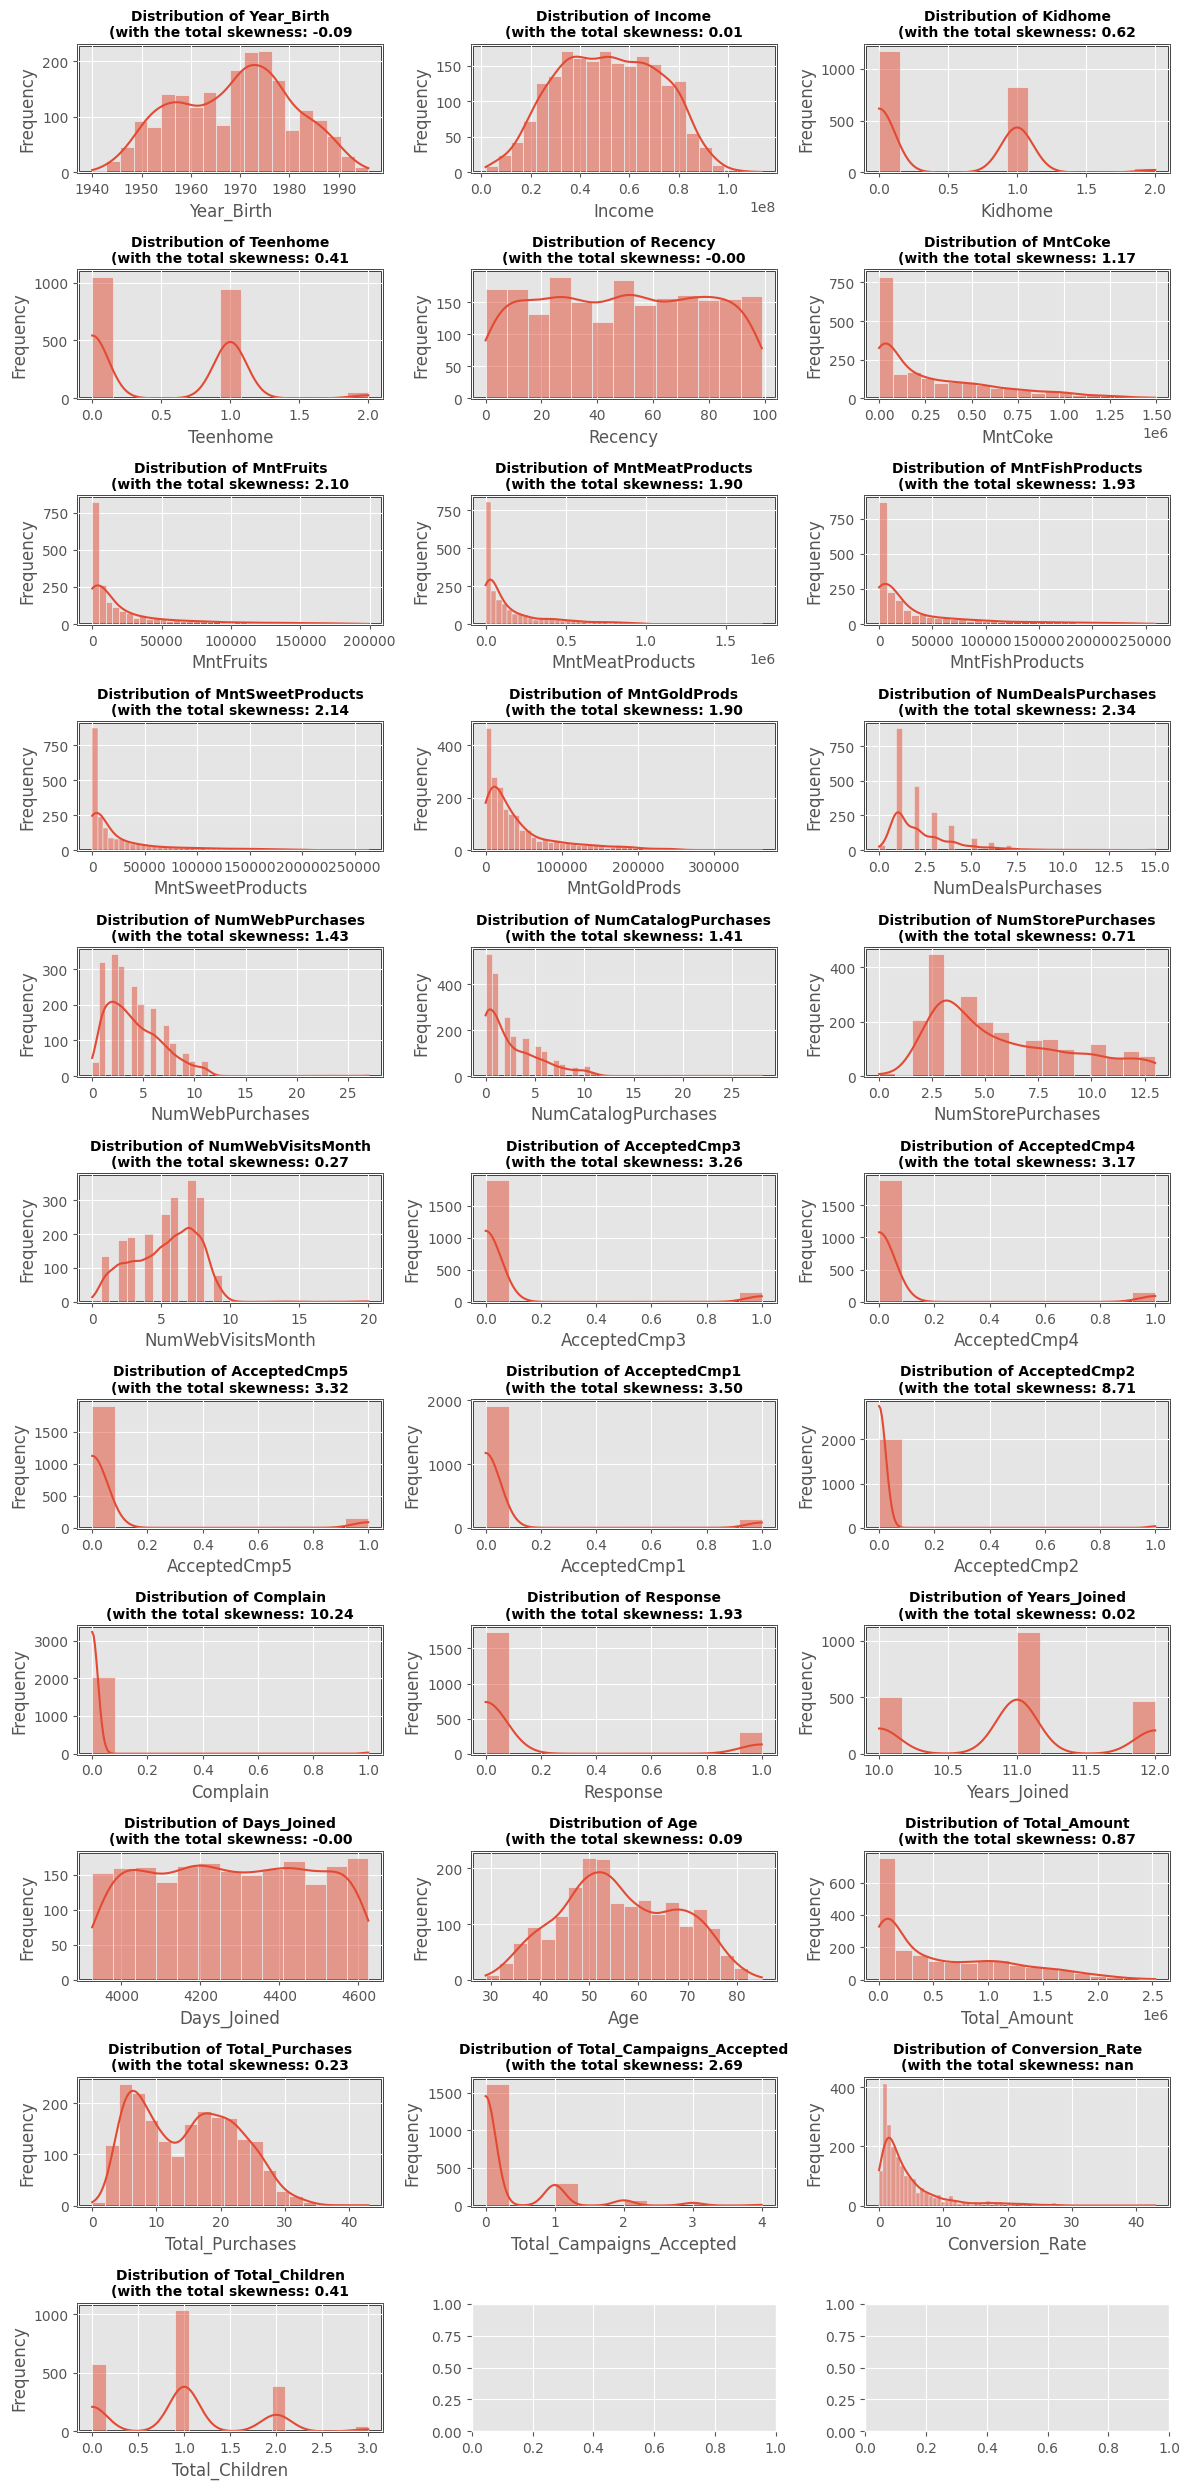

In [78]:
fig, ax = plt.subplots(11, 3, figsize=(12, 25))
ax = ax.flatten()

# Setting the skew for numerical columns
for i, column_name in enumerate(num_var):
    skewness = df[column_name].skew()

    # Setting the histogram plot
    sns.histplot(data=df, x=column_name, kde= True, ax=ax[i])
    ax[i].set_title(f'Distribution of {column_name}\n(with the total skewness: {skewness:.2f}', fontweight='bold', fontsize=10)
    ax[i].set_xlabel(column_name)
    ax[i].set_ylabel('Frequency')
    ax[i].patch.set_edgecolor('black')  # Set border color
    ax[i].patch.set_linewidth(2) 

# Hide any empty subplots
for i in range(len(num_var), 6):
    fig.delaxes(ax[i])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


# **Data Preparation**

In [79]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntCoke', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Years_Joined', 'Days_Joined',
       'Age', 'Age_Group', 'Marital_Simplified', 'Income_Group',
       'Total_Amount', 'Recency_Group', 'Total_Purchases', 'Preferred_Channel',
       'Total_Campaigns_Accepted', 'Conversion_Rate', 'Total_Children'],
      dtype='object')

I will drop unnecesary columns. 
- `Accepted Campaigns` (AcceptedCmpX) → These indicate responses to marketing campaigns, which might introduce bias in clustering. Clustering should be based on natural customer behavior, not marketing response history.

- `Number of Purchases` (NumX) → These may correlate with spending patterns, which are already represented in other features.

- `Monetary Spending` (MntX) → These values represent spending habits but could be redundant when using `Total_Amount` or other aggregate measures.
- `Year_Birth` → Redundant when Age is present.

- `Kidhome`, `Teenhome` → These are already captured in `Total_Children`.

- `Marital_Status` → A categorical variable that might not be necessary when `Marital_Simplified` is used instead.

- `Income_Group` → Might be categorical or redundant when numerical `Income` is used.

- `Recency_Group` → A binned version of `Recency`, which might lead to loss of information.

- `Preferred_Channel` → Could be categorical and not necessarily relevant for clustering customer behavior.

In [80]:
acc_cmp = [col for col in df.columns if 'AcceptedCmp' in col]
num_cmp = [col for col in df.columns if 'Num' in col]
mnt_cmp = [col for col in df.columns if 'Mnt' in col]

col_to_drop = num_cmp + mnt_cmp + acc_cmp

df.drop(columns = col_to_drop, inplace=True)
df.drop(columns = ['Year_Birth', 'Kidhome', 'Teenhome','Marital_Status', 'Income_Group', 'Recency_Group', 'Preferred_Channel'], inplace=True)

In [81]:
df.columns

Index(['Education', 'Income', 'Dt_Customer', 'Recency', 'Complain', 'Response',
       'Years_Joined', 'Days_Joined', 'Age', 'Age_Group', 'Marital_Simplified',
       'Total_Amount', 'Total_Purchases', 'Total_Campaigns_Accepted',
       'Conversion_Rate', 'Total_Children'],
      dtype='object')

Separate the columns based on their data types.

In [82]:
cat = []
num = []
dat = []

numeric = ['int64', 'int32', 'float64']

for i in df.columns:
    data_type = str(df[i].dtype)
    if data_type == 'object' :
        cat.append(i)
    elif data_type in numeric :
        num.append(i)
    else:
        dat.append(i)

In [83]:
num = df[num]

df_num = pd.DataFrame(num.nunique(), columns = ['Total_unique']).reset_index()
df_num = df_num.rename(columns = {'index' : 'Name_of_column'})

num_a = []
num_b = []
for i,y in enumerate(df_num.Name_of_column):
    if df_num['Total_unique'][i] > 2:
        num_a.append(y)
    else:
        num_b.append(y)

In [84]:
df_2 = df.copy()

## Scaling

I will scale the numerical datatype.

In [85]:
df[num_a].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    2046 non-null   float64
 1   Recency                   2046 non-null   int64  
 2   Years_Joined              2046 non-null   int64  
 3   Days_Joined               2046 non-null   int64  
 4   Age                       2046 non-null   int64  
 5   Total_Amount              2046 non-null   int64  
 6   Total_Purchases           2046 non-null   int64  
 7   Total_Campaigns_Accepted  2046 non-null   int64  
 8   Conversion_Rate           2046 non-null   float64
 9   Total_Children            2046 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 175.8 KB


In [86]:
df[num_a] = df[num_a].replace([np.inf, -np.inf], 0)

In [87]:

scaler = MinMaxScaler()
features = df[num_a]

df[num_a] = scaler.fit_transform(features.values)

## Label encoding

In [88]:
df.nunique()

Education                      5
Income                      1963
Dt_Customer                  663
Recency                      100
Complain                       2
Response                       2
Years_Joined                   3
Days_Joined                  663
Age                           56
Age_Group                      3
Marital_Simplified             2
Total_Amount                1052
Total_Purchases               37
Total_Campaigns_Accepted       5
Conversion_Rate              178
Total_Children                 4
dtype: int64

I will manually encode the values for the columns `Education`, `Marital_Simplified`, and `Age_Group` using .map to ensure they are ordered correctly.

In [89]:
# Label Encoding
mapping_education = {
    'SMA' : 0,
    'D3'  : 1,
    'S1'  : 2,
    'S2'  : 3,
    'S3'  : 4
} 

mapping_marital = {
    'Never been married' : 0,
    'Ever been married' : 1
}

mapping_grup_age = {
    'Adult' : 0,
    'Middle-Aged'  : 1,
    'Senior' : 2
}



df['Education'] = df['Education'].map(mapping_education)
df['Marital_Simplified'] = df['Marital_Simplified'].map(mapping_marital)
df['Age_Group'] = df['Age_Group'].map(mapping_grup_age)



In [90]:
df.head()

Education    Income Dt_Customer   Recency  Complain  Response  \
0          2  0.503625  2012-09-04  0.585859         0         1   
1          2  0.398325  2014-03-08  0.383838         0         0   
2          2  0.623933  2013-08-21  0.262626         0         0   
3          2  0.222456  2014-02-10  0.262626         0         0   
4          4  0.505009  2014-01-19  0.949495         0         0   

   Years_Joined  Days_Joined       Age Age_Group  Marital_Simplified  \
0           1.0     0.948498  0.696429         2                   0   
1           0.0     0.161660  0.750000         2                   0   
2           0.5     0.446352  0.553571         1                   0   
3           0.0     0.198856  0.214286         1                   0   
4           0.0     0.230329  0.267857         1                   1   

   Total_Amount  Total_Purchases  Total_Campaigns_Accepted  Conversion_Rate  \
0      0.639683         0.581395                       0.0         0.083023   
1      0.008730         0.139535                       0.0         0.027907   
2      0.305952         0.488372                       0.0         0.122093   
3      0.019048         0.186047                       0.0         0.030930   
4      0.165476         0.441860                       0.0         0.088372   

   Total_Children  
0        0.000000  
1        0.666667  
2        0.000000  
3        0.333333  
4        0.333333

## Feature selection

For segmenting customer, there is a method called RFM Analysis, 
for you want to know deeply about RFM can read this reference : https://www.barilliance.com/rfm-analysis/#:~:text=RFM%20analysis%20is%20a%20data,much%20they've%20spent%20overall.
* Recency      : Date of Last of Purchases `Recency`
* Frequency    : Total Number of Orders    `Total_Purchases`
* Monetization : Total order value         `Total_Amount`
* Loyalty      : Total campaign accepted   `Total_Campaigns_Accepted`

In [91]:
df_mod = df[['Recency', 'Total_Purchases', 'Total_Amount', 'Total_Campaigns_Accepted']]

In [92]:
df_mod_cols = df_mod.columns

# Machine Learning

## Define the Optimal Number of Cluster

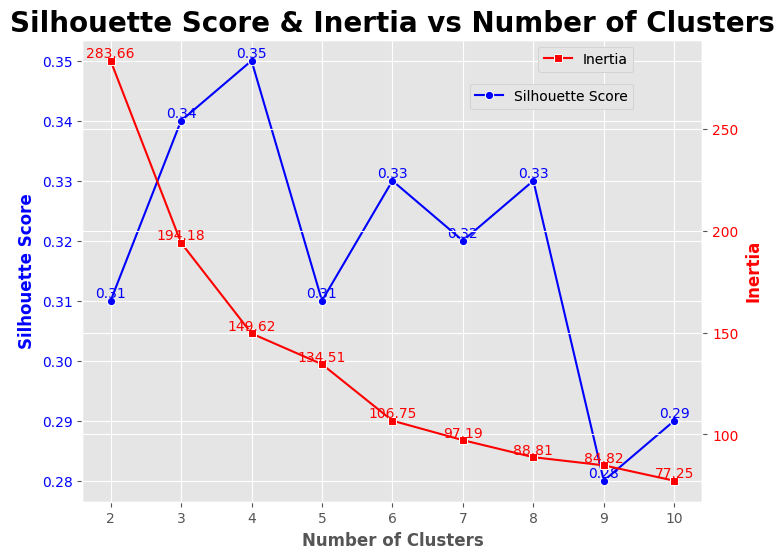

In [93]:

arr_silhouette_score = []
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_mod)
    preds = kmeans.predict(df_mod)
    
    # Compute silhouette score
    score_euclidean = silhouette_score(df_mod, preds, metric='euclidean')
    arr_silhouette_score.append(np.round(score_euclidean, 2))
    
    # Compute inertia
    inertia.append(np.round(kmeans.inertia_, 2))

x = range(2, 11)

plt.figure(figsize=(8, 6))

# Primary y-axis (Silhouette Score)
ax1 = plt.gca()
sns.lineplot(x=x, y=arr_silhouette_score, marker='o', label='Silhouette Score', ax=ax1, color='b')
for i, label in enumerate(arr_silhouette_score):
    ax1.text(x[i], arr_silhouette_score[i], label, ha='center', va='bottom', color='b')

ax1.set_ylabel('Silhouette Score', color='b', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='b')

# Secondary y-axis (Inertia)
ax2 = ax1.twinx()
sns.lineplot(x=x, y=inertia, marker='s', label='Inertia', ax=ax2, color='r')
for i, label in enumerate(inertia):
    ax2.text(x[i], inertia[i], label, ha='center', va='bottom', color='r')

ax2.set_ylabel('Inertia', color='r', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='r')

# Labels and Title
plt.xticks(range(2, 11))
ax1.set_xlabel('Number of Clusters', fontweight='bold')
plt.title('Silhouette Score & Inertia vs Number of Clusters', fontweight='bold', fontsize=20)
legend1 = ax1.legend(loc='upper right', bbox_to_anchor=(0.9, 0.92))
legend2 = ax2.legend(loc='upper right', bbox_to_anchor=(0.9, 1))
ax1.add_artist(legend1)
ax2.add_artist(legend2)
plt.show()


Considering both the silhouette score and inertia score, we can observe that the elbow point, as well as the peak of the inertia score, occurs at cluster number 4.

## Clustering

In [94]:
model = KMeans(n_clusters=4, random_state=0).fit(df_mod)
df_mod['Cluster'] = model.labels_
df['Cluster'] = model.labels_


## PCA

In [95]:
df_pca = df_mod.drop(columns = 'Cluster')
pca = PCA(n_components=2)
pca.fit(df_pca)
x_pca = pca.transform(df_pca)

In [96]:
pdf = pd.DataFrame(x_pca, columns= ['PC1', 'PC2'])

In [97]:
pdf['Cluster'] = model.labels_
pdf

PC1       PC2  Cluster
0     0.334717  0.260243        3
1    -0.283785 -0.172201        2
2    -0.114499  0.224199        1
3    -0.357424 -0.070824        2
4     0.331704 -0.313890        0
...        ...       ...      ...
2041 -0.205935 -0.268503        0
2042  0.132701  0.205365        1
2043  0.521966 -0.029946        3
2044 -0.226882  0.373783        1
2045 -0.201376 -0.103664        2

[2046 rows x 3 columns]

## Cluster Visualization

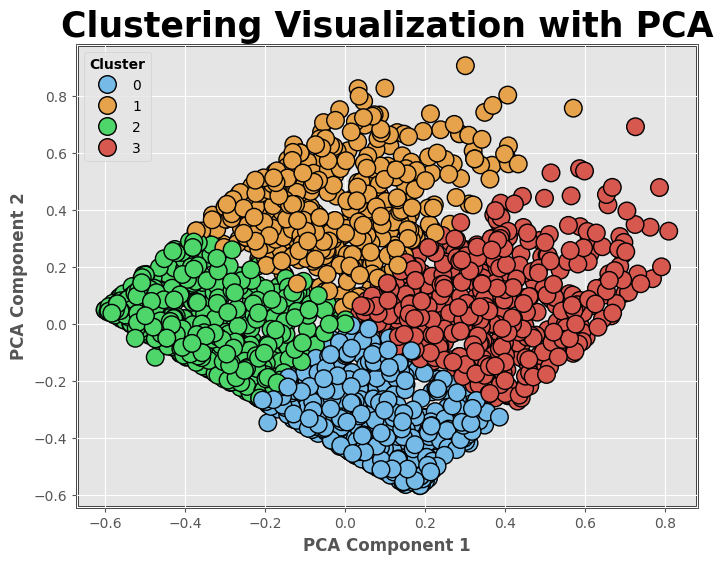

In [98]:
from matplotlib.font_manager import FontProperties
palette = {0: "#76bbe8", 1: "#e6a34c", 2: "#4fd66a", 3: "#d6584f"}
fig,ax = plt.subplots(figsize=(8,6))

sns.scatterplot(
    x="PC1", y="PC2",
    hue="Cluster",
    edgecolor='black',
    #linestyle='--',
    data=pdf,
    palette=palette,
    s=160,
    ax=ax
);

ax.set_xlabel("PCA Component 1", fontweight='bold')
ax.set_ylabel("PCA Component 2", fontweight='bold')
ax.set_title("Clustering Visualization with PCA", 
             fontsize=25, fontweight='bold')

ax.legend(title="Cluster", title_fontproperties=FontProperties(weight='bold'))
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(2)

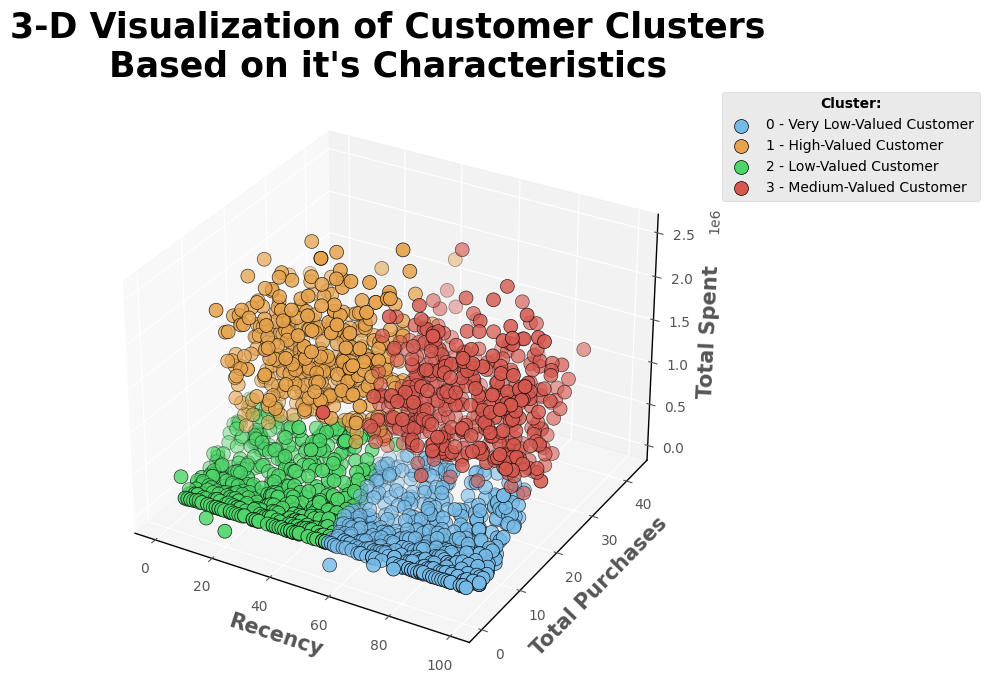

In [99]:
df_2['Cluster'] = model.labels_

fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=25, weight='bold')
ax.scatter(df_2['Recency'][df_2.Cluster == 0], df_2['Total_Purchases'][df_2.Cluster == 0], df_2['Total_Amount'][df_2.Cluster == 0], c='#76bbe8', s=100, edgecolor='black', label='0 - Very Low-Valued Customer')
ax.scatter(df_2['Recency'][df_2.Cluster == 1], df_2['Total_Purchases'][df_2.Cluster == 1], df_2['Total_Amount'][df_2.Cluster == 1], c='#e6a34c', s=100, edgecolor='black', label='1 - High-Valued Customer')
ax.scatter(df_2['Recency'][df_2.Cluster == 2], df_2['Total_Purchases'][df_2.Cluster == 2], df_2['Total_Amount'][df_2.Cluster == 2], c='#4fd66a', s=100, edgecolor='black',  label='2 - Low-Valued Customer')
ax.scatter(df_2['Recency'][df_2.Cluster == 3], df_2['Total_Purchases'][df_2.Cluster == 3], df_2['Total_Amount'][df_2.Cluster == 3], c='#d6584f', s=100, edgecolor='black', label='3 - Medium-Valued Customer')
ax.set_facecolor("white")  # Set 3D axis background to white

# Make grid panes transparent

ax.set_xlabel('Recency', fontweight='bold', fontsize=15)
ax.set_ylabel('Total Purchases', fontweight='bold', fontsize=15)
ax.set_zlabel('Total Spent', fontweight='bold', fontsize=15)
ax.legend(title='Cluster:', title_fontproperties=FontProperties(weight='bold'), loc='upper left', bbox_to_anchor=(1.05, 1))
ax.xaxis.line.set_color('black')
ax.yaxis.line.set_color('black')
ax.zaxis.line.set_color('black')
plt.tight_layout()
plt.show()

## Insight From Model

In [100]:
cluster = []

for i in df_2['Cluster']:
    if i == 0:
        grup = 'Very Low-Valued Customer'
    elif i == 1:
        grup = 'High-Valued Customer'
    elif i == 2:
        grup = 'Low-Valued Customer'
    else :
        grup = 'Medium-Valued Customer'
    cluster.append(grup)
    
df_2['Cluster'] = cluster

In [101]:
mod_col = df_mod_cols.insert(1, 'Cluster')
display(df_2[mod_col].groupby('Cluster').agg(['mean','median', 'max', 'min']))

Recency                Total_Purchases             \
                               mean median max min            mean median max   
Cluster                                                                         
High-Valued Customer      22.063570   22.0  47   0       22.107579   22.0  43   
Low-Valued Customer       24.594324   25.0  49   0        9.532554    9.0  23   
Medium-Valued Customer    72.790356   72.0  99  47       21.628931   22.0  39   
Very Low-Valued Customer  74.360071   75.0  99  50        9.563280    8.0  21   

                              Total_Amount                              \
                         min          mean     median      max     min   
Cluster                                                                  
High-Valued Customer      11  1.203729e+06  1147000.0  2525000  277000   
Low-Valued Customer        0  1.611068e+05    78000.0   825000    6000   
Medium-Valued Customer     1  1.184453e+06  1127000.0  2524000  416000   
Very Low-Valued Customer   0  1.536007e+05    84000.0   801000    5000   

                         Total_Campaigns_Accepted                 
                                             mean median max min  
Cluster                                                           
High-Valued Customer                     0.638142    0.0   4   0  
Low-Valued Customer                      0.090150    0.0   2   0  
Medium-Valued Customer                   0.540881    0.0   4   0  
Very Low-Valued Customer                 0.078431    0.0   1   0

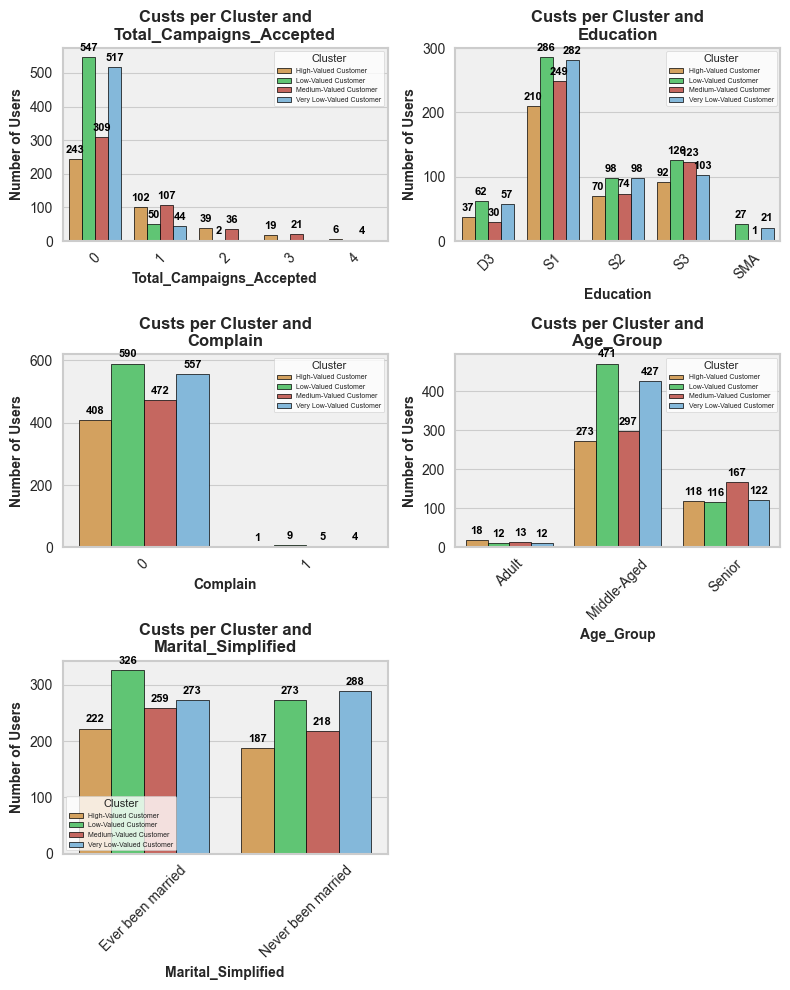

In [129]:
# Define custom color palette
custom_palette = {
    "Very Low-Valued Customer": "#76bbe8",  
    "High-Valued Customer": "#e6a34c",  
    "Low-Valued Customer": "#4fd66a",  
    "Medium-Valued Customer": "#d6584f"
}

# List of categorical columns to iterate over
columns_to_plot = ['Total_Campaigns_Accepted', 'Education', 'Complain', 'Age_Group', 'Marital_Simplified']

# Set figure size and grid layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))  # 2 rows, 3 columns (extra space for balance)
axes = axes.flatten()  # Flatten to iterate easily

# Set plot style
sns.set_style("whitegrid")

# Iterate over each column and generate a bar chart
for i, column in enumerate(columns_to_plot):
    ax = axes[i]  # Select subplot

    # Aggregate data
    df_agg = df_2.groupby(['Cluster', column]).size().reset_index(name='User_Count')

    # Create bar plot with custom color mapping
    sns.barplot(
        data=df_agg, 
        x=column, 
        y='User_Count', 
        hue='Cluster', 
        palette=custom_palette,  # Use custom palette
        edgecolor='black',  # Add border to bars
        ax=ax  # Assign plot to the correct subplot
    )

    # Add data labels
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=3, color='black', weight='bold')

    # Set labels and title
    ax.set_xlabel(column, fontsize=10, fontweight='bold')
    ax.set_ylabel('Number of Users', fontsize=10, fontweight='bold')
    ax.set_title(f'Custs per Cluster and\n{column}', fontsize=12, fontweight='bold')
    ax.tick_params(axis='x', rotation=45)  # Rotate x labels if needed
    ax.legend(title="Cluster", fontsize=5, title_fontsize=8, loc="best", frameon=True)


    # Add border to the entire chart
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)

    # Set grey background inside the border
    ax.set_facecolor("#f0f0f0")  # Light grey background inside each subplot

# Remove any empty subplot if fewer than 6 plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  

# Adjust layout
plt.tight_layout()
plt.show()


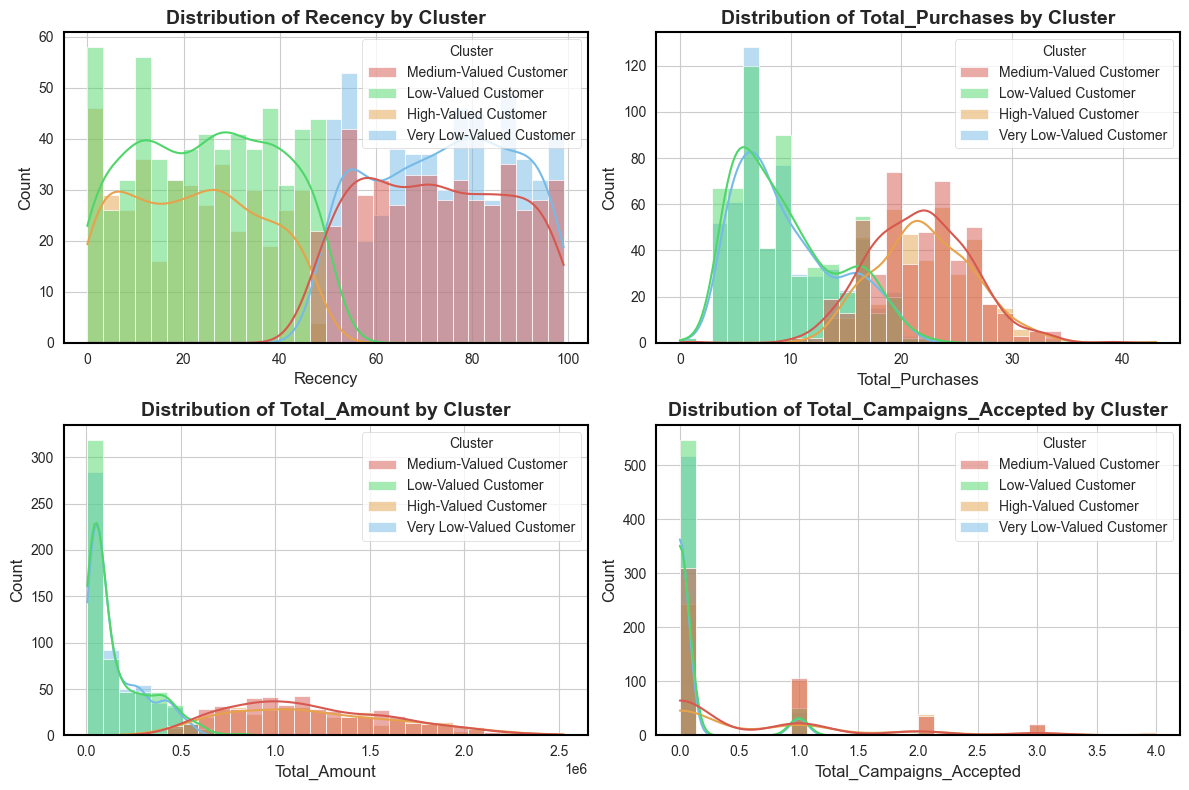

In [131]:

# Define the features to plot
features = ["Recency", "Total_Purchases", "Total_Amount", "Total_Campaigns_Accepted"]
palette = {
    "Very Low-Valued Customer": "#76bbe8",  
    "High-Valued Customer": "#e6a34c",  
    "Low-Valued Customer": "#4fd66a",  
    "Medium-Valued Customer": "#d6584f"
}# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through each feature to create a subplot
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    ax = sns.histplot(data=df_2, x=feature, hue="Cluster", kde=True, bins=30, palette=palette)

    # Set bold title
    plt.title(f"Distribution of {feature} by Cluster", fontsize=14, fontweight="bold")

    # Add border around each subplot
    for spine in ax.spines.values():
        spine.set_edgecolor("black")  # Border color
        spine.set_linewidth(1.5)  # Border thickness

plt.tight_layout()
plt.show()


In [103]:
df_ac = df_2.groupby(['Cluster'])['Age'].count().reset_index()
df_ac.rename(columns = {'Age' : 'Total Customer'}, inplace=True)
df_ac['Percentage'] = np.round(df_ac['Total Customer'] / df_ac['Total Customer'].sum() * 100, 2)
df_ac

Cluster  Total Customer  Percentage
0      High-Valued Customer             409       19.99
1       Low-Valued Customer             599       29.28
2    Medium-Valued Customer             477       23.31
3  Very Low-Valued Customer             561       27.42

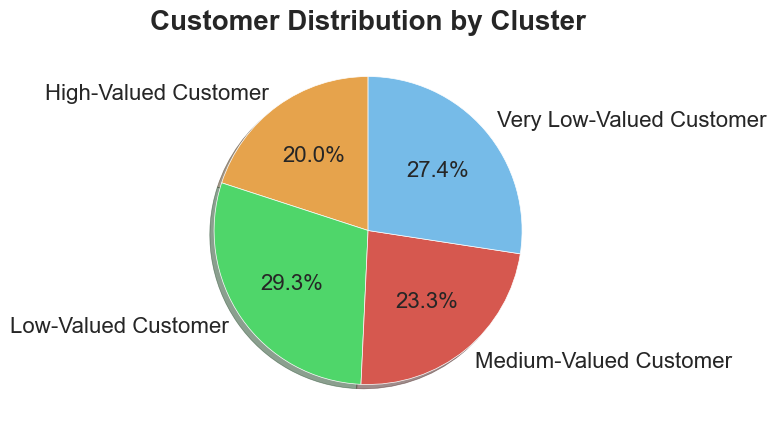

In [136]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 5))

# Define color mapping
my_colors = {
    "Very Low-Valued Customer": "#76bbe8",  
    "High-Valued Customer": "#e6a34c",  
    "Low-Valued Customer": "#4fd66a",  
    "Medium-Valued Customer": "#d6584f"
}

# Ensure colors are mapped correctly
colors = [my_colors[label] for label in df_ac['Cluster']]

# Create pie chart
plt.pie(df_ac['Total Customer'], labels=df_ac['Cluster'], autopct='%1.1f%%', 
        startangle=90, shadow=True, colors=colors, textprops={'fontsize': 16})

# Set title
plt.title('Customer Distribution by Cluster', fontsize=20, fontweight='bold')

# Make background transparent
# plt.gcf().set_facecolor('none')

# Show plot
plt.show()


<h2><center>Customer Personality Analysis for Each Cluster</center></h2>

**High-Valued Customer**
- Customers in this group have a low average recency (22 days), a high average total purchase (22 times), and a high average total amount (1.20 million Rupiah). 20% of our customers fall into this category. 

**Medium-Valued Customer**
- Customers on this group have high average recency (72 days), high average total purchase (22 times) and high average total amount (1,18 Million Rupiah).There 24.09% of our customer fall into this category. There are 309 customer never accept our campaign, 107 accepted it once, 36 accepted it twice, 21 accepted it three times and 4 accepted it four times. 

**Low-Valued Customer**
- Customers on this group have low average recency (24 days), low average total purchase (10 times) and low average total amount (161K Rupiah).There 29.03% of our customer fall into this category. There are 547 customer never accept our campaign, 50 accepted it once and 2 accepted it twice.

**Very Low-Valued Customer**
- Customers on this group have high average recency (74 days), low average total purchase (10 times) and low average total amount (153K Rupiah).There 28,44% of our customer fall into this category. There are 517 customer never accept our campaign and 44 accepted it once.
